#**Project Title : Seoul Bike Sharing Demand Prediction**

##### **Name**    - Aniket Abhit Jadhav
##### **Project Type**    - EDA

##**Problem Description**



#####Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes

##**Data Description**

#####The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

##**Attribute Information:**

#####Date : year-month-day

#####Rented Bike count - Count of bikes rented at each hour

#####Hour - Hour of he day

#####Temperature-Temperature in Celsius

#####Humidity - %

#####Windspeed - m/s

#####Visibility - 10m

#####Dew point temperature - Celsius

#####Solar radiation - MJ/m2

#####Rainfall - mm

#####Snowfall - cmSnowfall - cm

#####Seasons - Winter, Spring, Summer, Autumn

#####Holiday - Holiday/No holiday

#####Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

Github Link :- https://github.com/Aniketj777/Bike_Sharing_Demand_Prediction

Importing Modules

In [1]:
import pandas as pd
import numpy as np

# visulation module
import seaborn as sns
import matplotlib.pyplot as plt

# Datetime module
from datetime import datetime
import datetime as dt

# import train test split
from sklearn.model_selection import train_test_split

# import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# import regression modules
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


import warnings
warnings.filterwarnings('ignore')

##Mount the drive and import the datset

In [2]:
# import from google drive

from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
#load the seol bike data set from drive

df = pd.read_csv("/content/drive/MyDrive/Alma Better/Capstone project/Ml - Regression/1).Mobile price retection/SeoulBikeData.csv", encoding = 'latin')

##**lets Understand More About The Data**


In [4]:
# Viewing the data of top 10 rows to take a glimps of the data


df.head(10)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   
5  01/12/2017                100     5             -6.4           37   
6  01/12/2017                181     6             -6.6           35   
7  01/12/2017                460     7             -7.4           38   
8  01/12/2017                930     8             -7.6           37   
9  01/12/2017                490     9             -6.5           27   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   
5               1.5              2000                      -18.7   
6               1.3              2000                      -19.5   
7               0.9              2000                      -19.3   
8               1.1              2000                      -19.8   
9               0.5              1928                      -22.4   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                     0.00           0.0            0.0  Winter  No Holiday   
1                     0.00           0.0            0.0  Winter  No Holiday   
2                     0.00           0.0            0.0  Winter  No Holiday   
3                     0.00           0.0            0.0  Winter  No Holiday   
4                     0.00           0.0            0.0  Winter  No Holiday   
5                     0.00           0.0            0.0  Winter  No Holiday   
6                     0.00           0.0            0.0  Winter  No Holiday   
7                     0.00           0.0            0.0  Winter  No Holiday   
8                     0.01           0.0            0.0  Winter  No Holiday   
9                     0.23           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes  
5             Yes  
6             Yes  
7             Yes  
8             Yes  
9             Yes

In [5]:
# Viewing the data of botton 5 rows to take a glimps of the data

df.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

In [6]:
# getting the shape of data

df.shape

(8760, 14)

In [7]:
# getting the info of data


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [8]:
#print the unique value

df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [9]:
# checking for any null values

df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [10]:
missing = pd.DataFrame((df.isnull().sum()*100 / df.shape[0]).reset_index())
missing

index    0
0                        Date  0.0
1           Rented Bike Count  0.0
2                        Hour  0.0
3             Temperature(°C)  0.0
4                 Humidity(%)  0.0
5            Wind speed (m/s)  0.0
6            Visibility (10m)  0.0
7   Dew point temperature(°C)  0.0
8     Solar Radiation (MJ/m2)  0.0
9                Rainfall(mm)  0.0
10              Snowfall (cm)  0.0
11                    Seasons  0.0
12                    Holiday  0.0
13            Functioning Day  0.0



*   In this we come to know that Data set contains 8760 rouws and 14 columns
*   In a day we have 24 hrs and have 365 days a year so a 365 multiply by 24 = 8760, which represents the number of rows in the dataset



In [11]:
# Lets check for missing values

def plot_null(df):
  null_count = df.isnull().sum()
  columns = null_count.index
  counts = null_count.values

  plt.figure(figsize=(10,6))
  plt.plot(columns, counts, "o")
  plt.xlabel("columns")
  plt.ylabel("Null Values count")
  plt.title("Null Values per columns")
  plt.xticks(rotation = 90)
  plt.show()

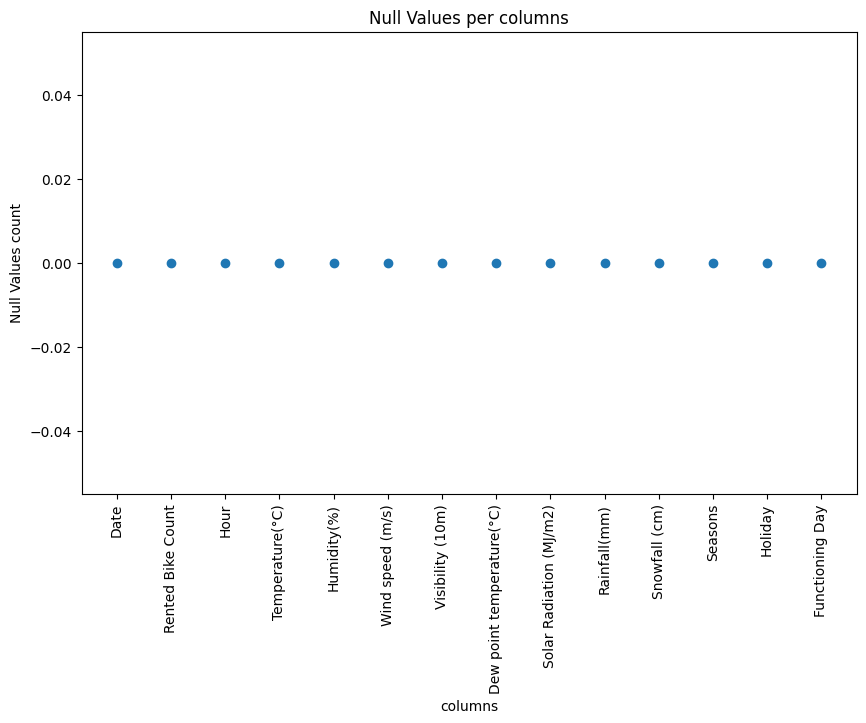

In [12]:
plot_null(df)

As we see there is no null values available in our data set

#**Now lets check for duplicate values**

"Duplication" just means that you have repeated data in your dataset. This could be due to things like data entry errors or data collection methods.

by removing duplication in our data set, Time and money are saved by not sending identical communications multiple times to the same person.

In [13]:
values = len(df[df.duplicated()])
values

0

we get that there is no dubpliacte value present in our data set

#**Change column name for our commend**

In [14]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

Some of the columns name in the dataset are too large and clumsy so we change the the into some simple name, and it don't affect our end results.

In [15]:
df = df.rename(columns={'Rented Bike Count':"Rented_Bike_Count",
                        'Temperature(°C)':"Temperature",
                        'Humidity(%)':"Humidity",
                        'Wind speed (m/s)':"Wind_speed",
                        'Visibility (10m)':"Visibility",
                        'Dew point temperature(°C)':"Dew_point_temperature",
                        'Solar Radiation (MJ/m2)':"Solar_Radiation",
                        'Rainfall(mm)':"Rainfall",
                        'Snowfall (cm)':"Snowfall",
                        'Functioning Day':"Functioning_Day"})

In [16]:
df.head()

Date  Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  \
0  01/12/2017                254     0         -5.2        37         2.2   
1  01/12/2017                204     1         -5.5        38         0.8   
2  01/12/2017                173     2         -6.0        39         1.0   
3  01/12/2017                107     3         -6.2        40         0.9   
4  01/12/2017                 78     4         -6.0        36         2.3   

   Visibility  Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  \
0        2000                  -17.6              0.0       0.0       0.0   
1        2000                  -17.6              0.0       0.0       0.0   
2        2000                  -17.7              0.0       0.0       0.0   
3        2000                  -17.6              0.0       0.0       0.0   
4        2000                  -18.6              0.0       0.0       0.0   

  Seasons     Holiday Functioning_Day  
0  Winter  No Holiday             Yes  
1  Winter  No Holiday             Yes  
2  Winter  No Holiday             Yes  
3  Winter  No Holiday             Yes  
4  Winter  No Holiday             Yes

By this way we make our columns into proper name

#**Braking date columns**

In [17]:
# Changing the "Date" column into three "year","month","day" column


df['Date'] = df['Date'].apply(lambda x: dt.datetime.strptime(x, "%d/%m/%Y"))

In [18]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day_name()

In [19]:
df['Day'].value_counts()

Friday       1272
Saturday     1248
Sunday       1248
Monday       1248
Tuesday      1248
Wednesday    1248
Thursday     1248
Name: Day, dtype: int64

In [20]:
# Creating new column of weekend

df['Weekend'] = df['Day'].apply(lambda x: 1 if x=='Saturday' or x=='Sunday' else 0)

In [21]:
df.drop(columns = ['Date','Day','Year'], inplace=True)

In [22]:
df.head()

Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  Visibility  \
0                254     0         -5.2        37         2.2        2000   
1                204     1         -5.5        38         0.8        2000   
2                173     2         -6.0        39         1.0        2000   
3                107     3         -6.2        40         0.9        2000   
4                 78     4         -6.0        36         2.3        2000   

   Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall Seasons  \
0                  -17.6              0.0       0.0       0.0  Winter   
1                  -17.6              0.0       0.0       0.0  Winter   
2                  -17.7              0.0       0.0       0.0  Winter   
3                  -17.6              0.0       0.0       0.0  Winter   
4                  -18.6              0.0       0.0       0.0  Winter   

      Holiday Functioning_Day  Month  Weekend  
0  No Holiday             Yes     12        0  
1  No Holiday             Yes     12        0  
2  No Holiday             Yes     12        0  
3  No Holiday             Yes     12        0  
4  No Holiday             Yes     12        0

So we convert the date feature into 3 different different features
i.e:
1.   "year"
2.   "moth"
3.   "day"

In year column we get all the years values
In the month column we gett all the months value
In the day column we gett all the days name


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented_Bike_Count      8760 non-null   int64  
 1   Hour                   8760 non-null   int64  
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   Wind_speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew_point_temperature  8760 non-null   float64
 7   Solar_Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
 10  Seasons                8760 non-null   object 
 11  Holiday                8760 non-null   object 
 12  Functioning_Day        8760 non-null   object 
 13  Month                  8760 non-null   int64  
 14  Weekend                8760 non-null   int64  
dtypes: f

#**Now we will change its data type**

In [24]:
# Change int data into categorial data

cols = ("Month","Weekend","Hour")

for col in cols:
  df[col] = df[col].astype("category")

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented_Bike_Count      8760 non-null   int64   
 1   Hour                   8760 non-null   category
 2   Temperature            8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   Wind_speed             8760 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew_point_temperature  8760 non-null   float64 
 7   Solar_Radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   float64 
 9   Snowfall               8760 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning_Day        8760 non-null   object  
 13  Month                  8760 non-null   category
 14  Weekend                8760 non-null   c

In [26]:
df.columns

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day', 'Month',
       'Weekend'],
      dtype='object')

#**Exploratory Data Analysis: (EDA)**

Why to do EDA?


*   It can help us to make decisions before you model your data.
*   Another benefit of EDA is that it can help you understand the variables in your dataset.
*   This can help you organize your dataset and begin to pinpoint relationships between variables, which is an integral part of data analysis.



##**Univariate Analysis**


Why do you do univariate analysis?

*   Univariate is a term commonly used in statistics to describe a type of data which consists of observations on only a single characteristic or attribute.
*  A simple example of univariate data would be the salaries of workers in industry.
*  Like all the other data, univariate data can be visualized using graphs, images or other analysis tools after the data is measured, collected, reported, and analyzed.


##**Analysis of Dependent Variable**

**What is a dependent variable in data analysis?**
* ***we analyse our dependent variable,A dependent variable is a variable whose value will change depending on the value of another variable.***


##**Analysation of Categorical Variables**

*  Our dependent variable is "Rented Bike Count" so we need to analysis this
column with the other columns by using some visualisation plot.first we analyze the category data tyep then we proceed with the numerical data type

Firstly we see Bike Rented on weekdays and weekend

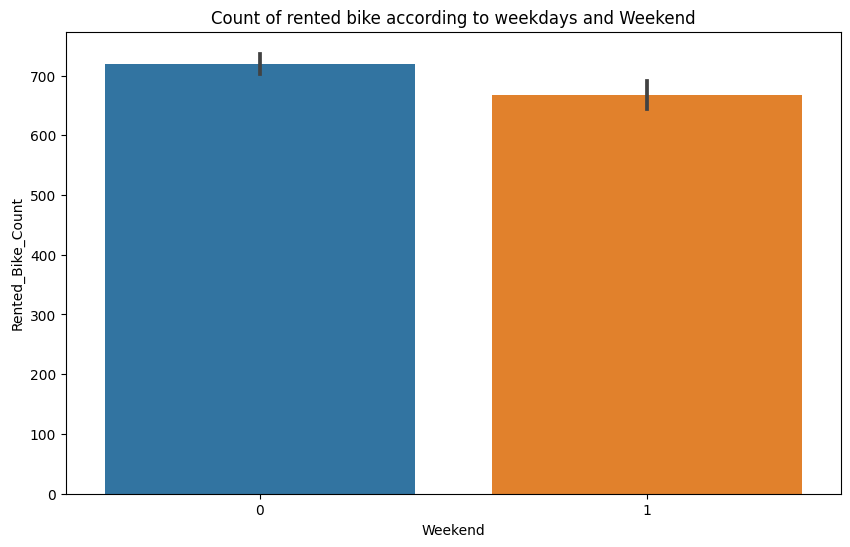

In [27]:
plt.figure(figsize=(10,6))
sns.barplot(y ='Rented_Bike_Count', x="Weekend", data=df)
plt.title("Count of rented bike according to weekdays and Weekend")
plt.show()

Now we will check rented bike as per month

Text(0.5, 1.0, 'Count of rented bike as per month')

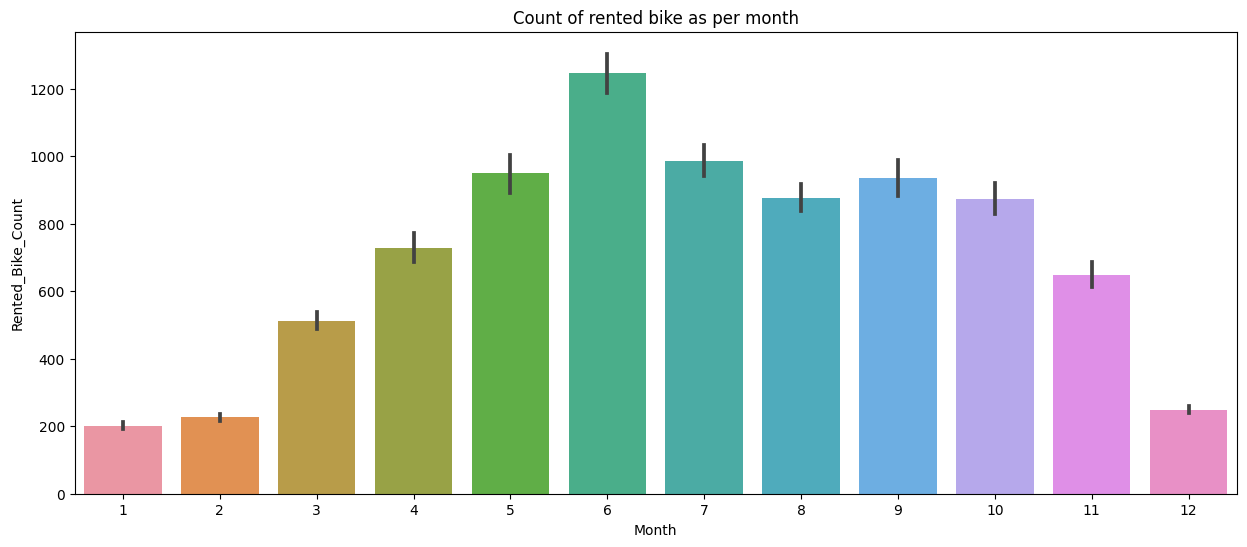

In [28]:
plt.figure(figsize=(15,6))
sns.barplot(x='Month', y = 'Rented_Bike_Count', data=df)
plt.title("Count of rented bike as per month")

From the above bar chart we can clearly see that from month 5 to month 10 the demand for rented bike is high as compair to other months.

##Count of rented bike on weekend and weekays

Text(0.5, 1.0, 'Count of rented bikes as per hours')

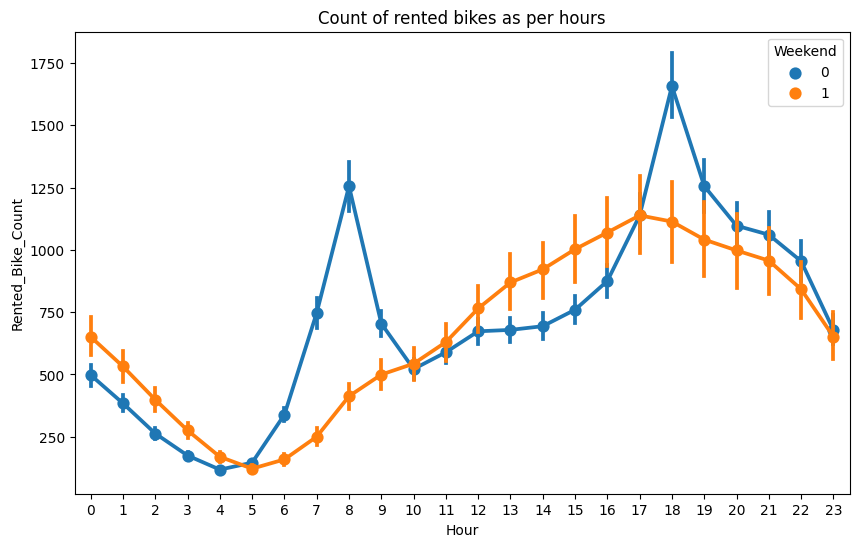

In [29]:
plt.figure(figsize=(10,6))
sns.pointplot(x='Hour',y='Rented_Bike_Count',hue = "Weekend" , data=df)
plt.title("Count of rented bikes as per hours")

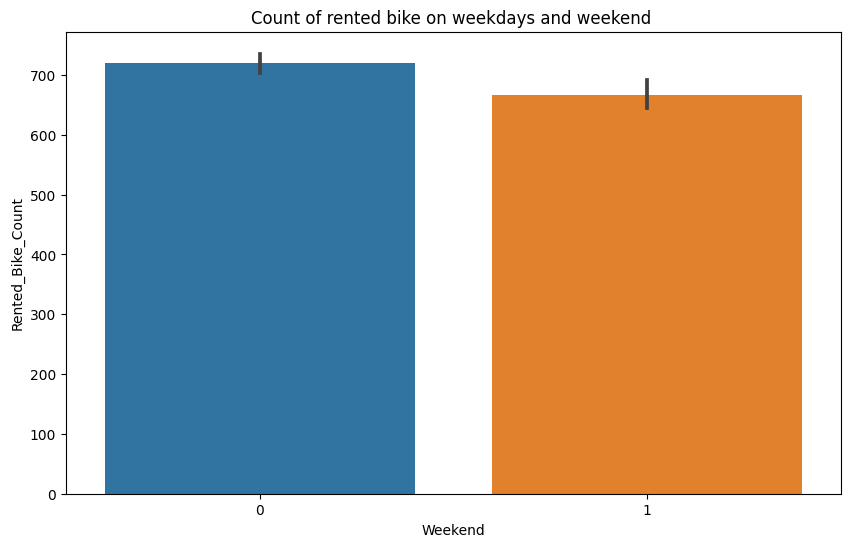

In [30]:
plt.figure(figsize=(10,6))
sns.barplot(x='Weekend', y='Rented_Bike_Count', data=df)
plt.title("Count of rented bike on weekdays and weekend ")
plt.show()

* From the above bar plot and point plot we can clearly see that on weekdays there are more demand of rented bike.
* From 6am to 10 am and 5 pm 8 pm the demand is more of rented bikes
* In the above point plot we see that blue line represents weekdays line and orange shows weekend line


##Analysis on "Hour" timeframe

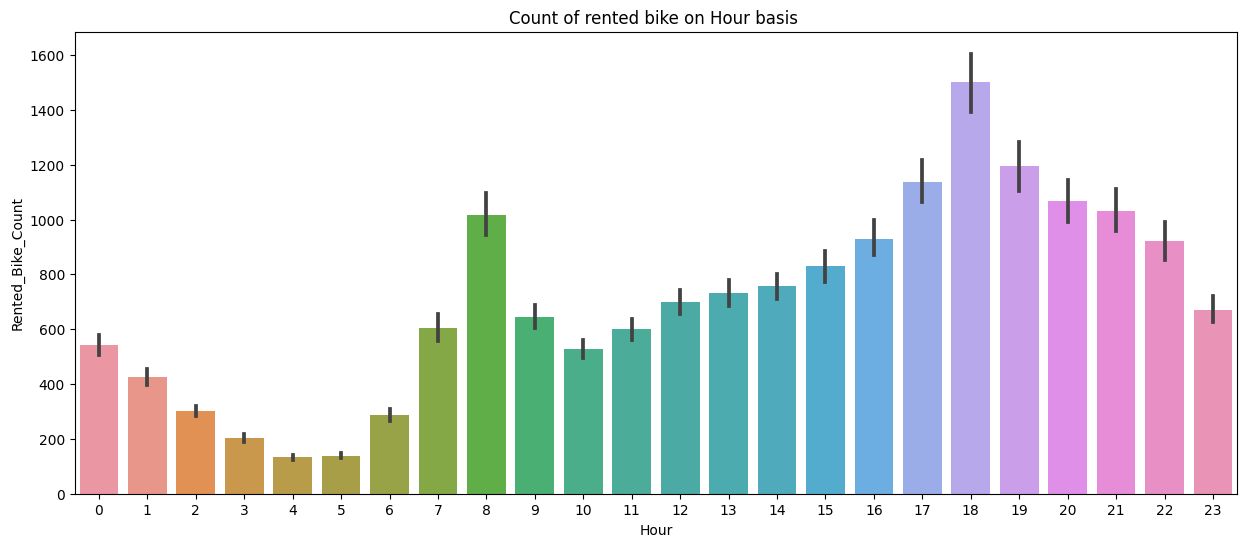

In [31]:
plt.figure(figsize=(15,6))
sns.barplot(x='Hour', y='Rented_Bike_Count', data=df)
plt.title("Count of rented bike on Hour basis ")
plt.show()



*   As we see in above data it is showing that from 7am to 9 am demand of rented bike start increasing and from 4 pm to 8 pm it has highest demand.
*   At 6 pm the demand of rented bike is at his peak because generally at this time peoples start returning to home from work.



##Count of bike rented according to function day

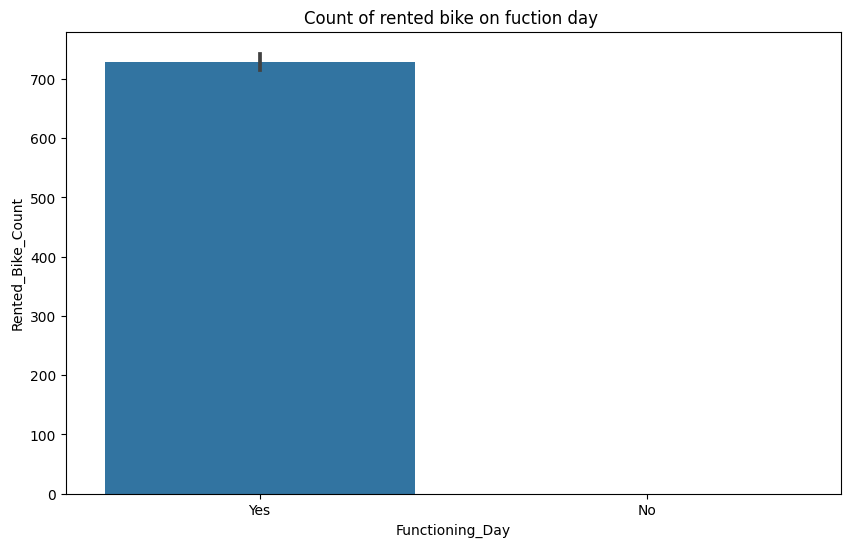

In [32]:
plt.figure(figsize=(10,6))
sns.barplot(x='Functioning_Day', y='Rented_Bike_Count', data=df)
plt.title("Count of rented bike on fuction day ")
plt.show()

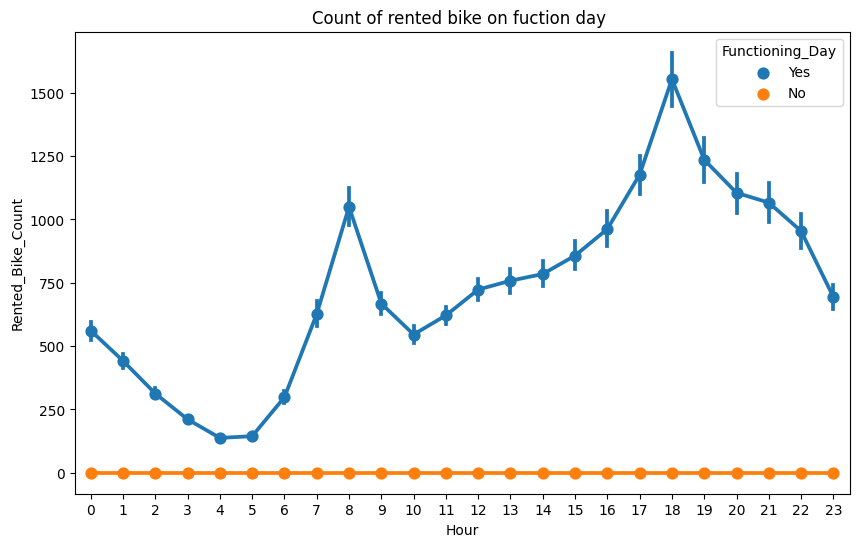

In [33]:
plt.figure(figsize=(10,6))
sns.pointplot(x='Hour', y='Rented_Bike_Count',hue='Functioning_Day', data=df)
plt.title("Count of rented bike on fuction day ")
plt.show()



*   In the above bar plot and point plot which shows the use of rented bike in functioning daya or not, and it clearly shows that,
*  Peoples dont use reneted bikes in no functioning day because most of the time there will be holiday on festival days



##Count of bike rental during different different seasons

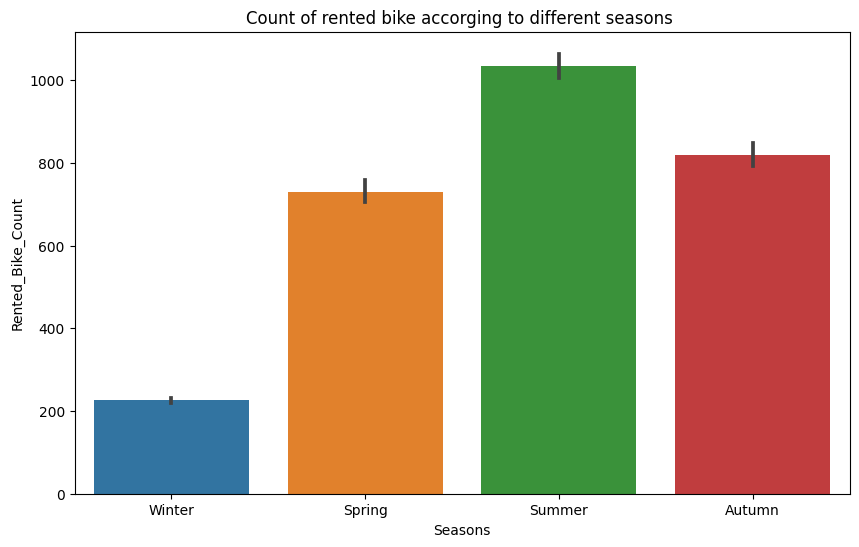

In [34]:
plt.figure(figsize=(10,6))
sns.barplot(x='Seasons', y='Rented_Bike_Count', data=df)
plt.title("Count of rented bike accorging to different seasons ")
plt.show()

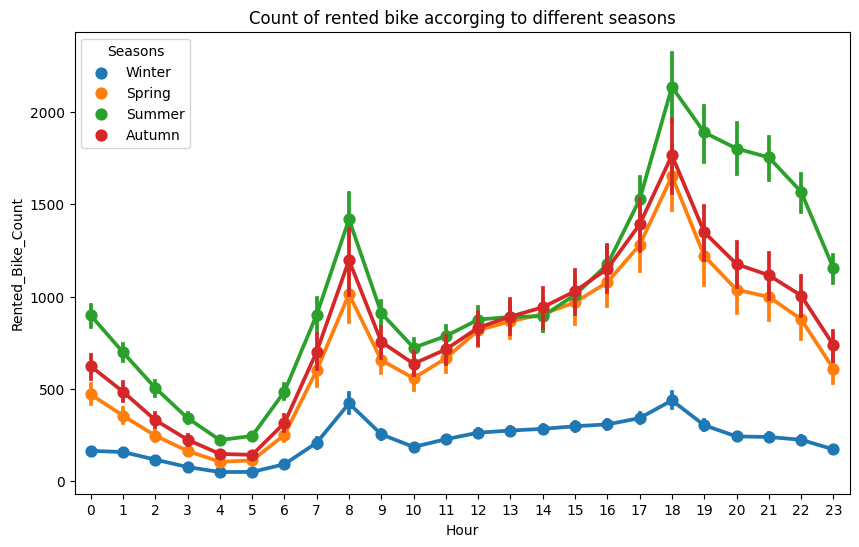

In [35]:
plt.figure(figsize=(10,6))
sns.pointplot(x='Hour', y='Rented_Bike_Count', hue='Seasons', data=df)
plt.title("Count of rented bike accorging to different seasons")
plt.show()

* In the above bar plot and point plot which shows the demand for rented bike in in four different seasons, and it clearly get sean that.
* In summer season the use of rented bike is high and peak time from 7 am - 9 am and 7 pm - 5 pm.
* In winter season the use of rented bike is very low.
* In the spring season the demand is at mediam level means not so much and not very less

##Count of bike rented when it is holiday



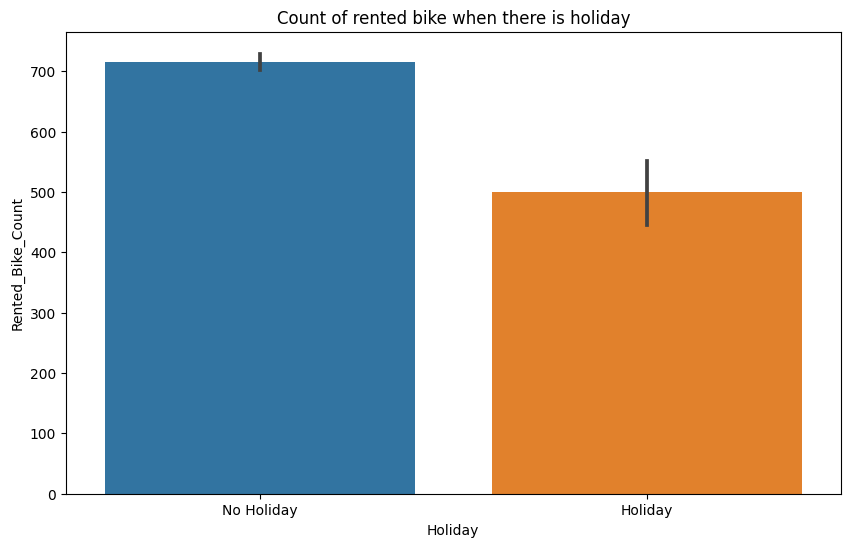

In [36]:
plt.figure(figsize=(10,6))
sns.barplot(x='Holiday', y='Rented_Bike_Count', data=df)
plt.title("Count of rented bike when there is holiday")
plt.show()

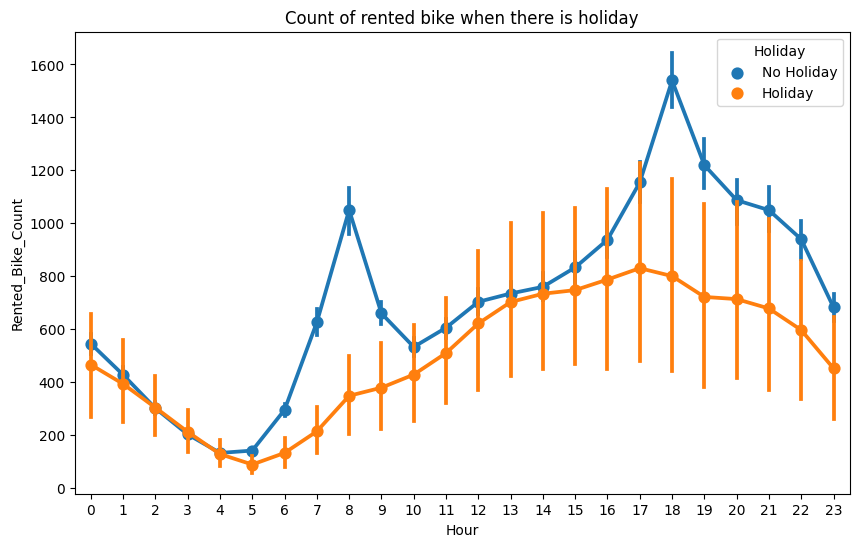

In [37]:
plt.figure(figsize=(10,6))
sns.pointplot(x='Hour', y='Rented_Bike_Count', hue='Holiday', data=df)
plt.title("Count of rented bike when there is holiday")
plt.show()



*   From the above chart it is clearly seen that during the Holiday demand or use of rented bike is very much less.
*   During Holiday people uses the rented bike from 2 pm to 10 pm



#**Working on Numerical features**

##**What is Numerical data**

*  Numerical data is a data type expressed in numbers, rather than natural language description. Sometimes called quantitative data, numerical data is always collected in number form.
* Numerical data differentiates itself from other number form data types with its ability to carry out arithmetic operations with these numbers.

In [38]:
# Getting out numerical columns

num_col = list(df.select_dtypes(['int64','float64']).columns)
num_col_index = pd.Index(num_col)
num_col_index

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall'],
      dtype='object')

Plot distplot on every int and float column

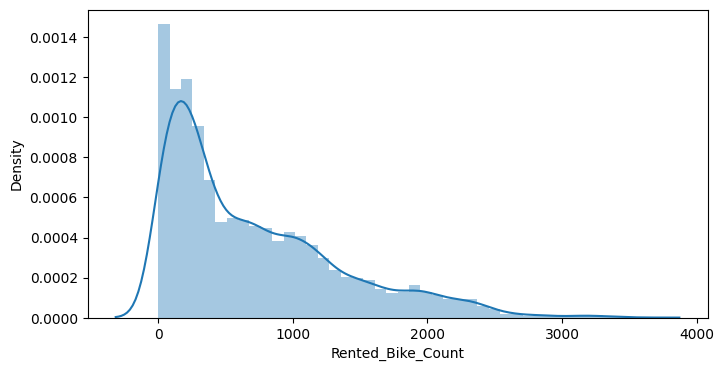

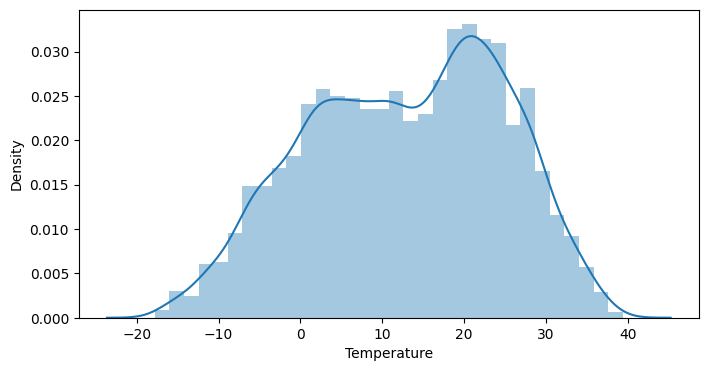

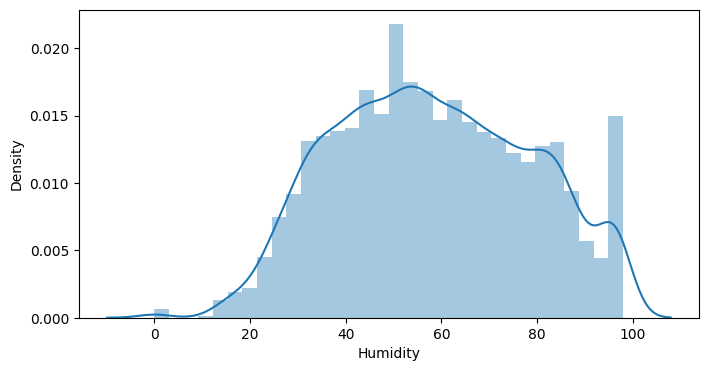

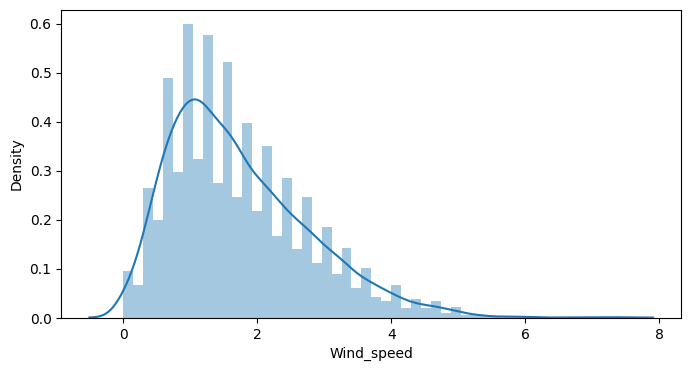

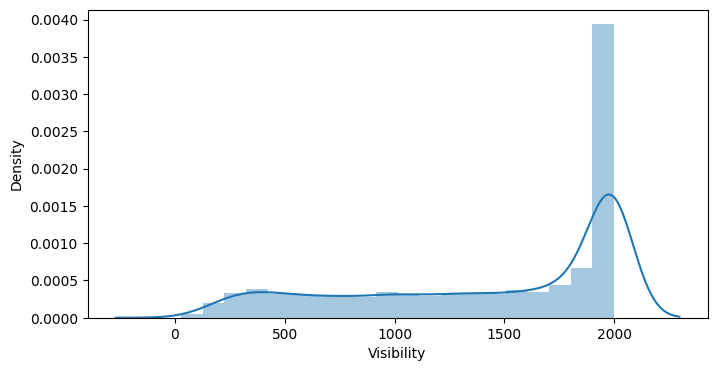

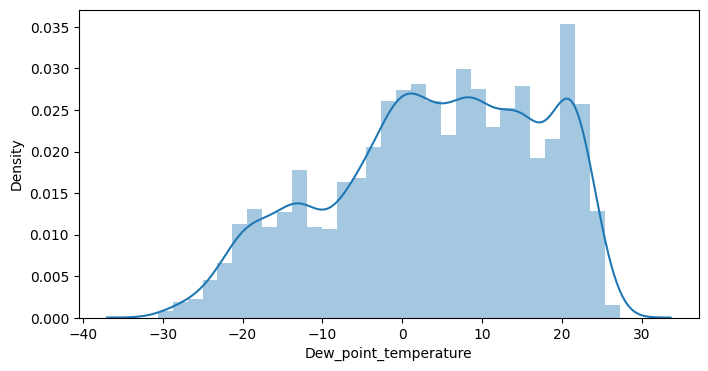

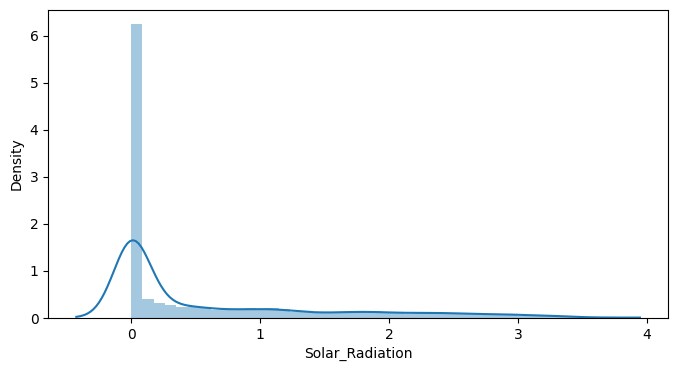

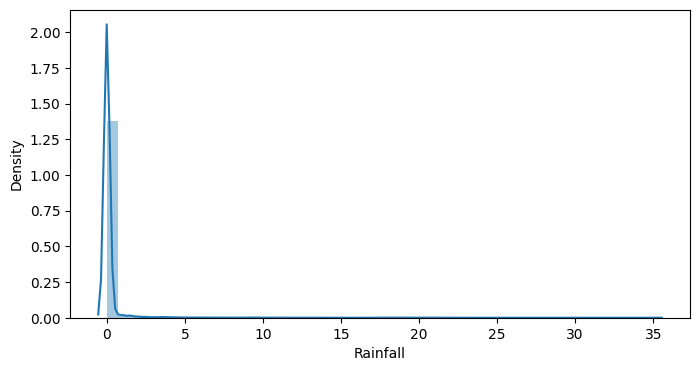

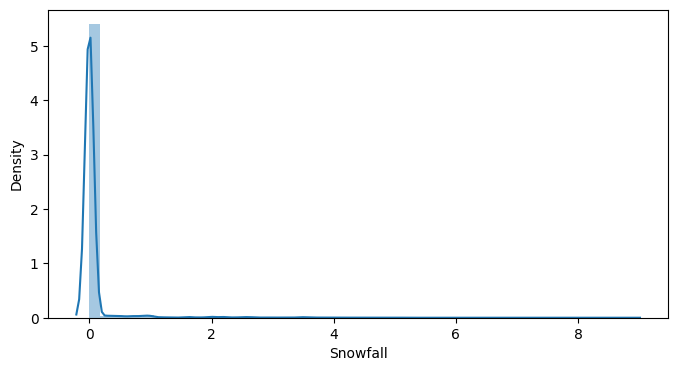

In [39]:
for col in num_col_index:
  plt.figure(figsize=(8,4))
  sns.distplot(x=df[col])
  plt.xlabel(col)
plt.show()

In [40]:
df.columns

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day', 'Month',
       'Weekend'],
      dtype='object')

In [41]:
coll = ("Temperature","Dew_point_temperature","Wind_speed","Snowfall","Solar_Radiation","Rainfall")

###We will ploting "Numerical" "Rented_Bike_Count"

**Finding relationship between Temperature and Rented bike count**

<Axes: xlabel='Temperature'>

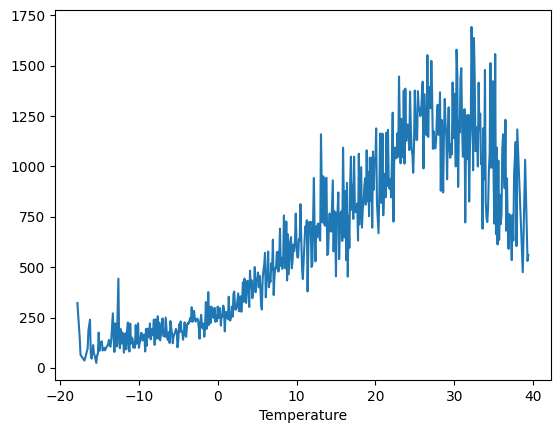

In [42]:
df.groupby("Temperature").mean()['Rented_Bike_Count'].plot()

From the above chart we get that people like to ride bikes when it is hot temperature from 20°C to 30°C

**Finding relationship between Dew Point Temperature and Rented bike count**

<Axes: xlabel='Dew_point_temperature'>

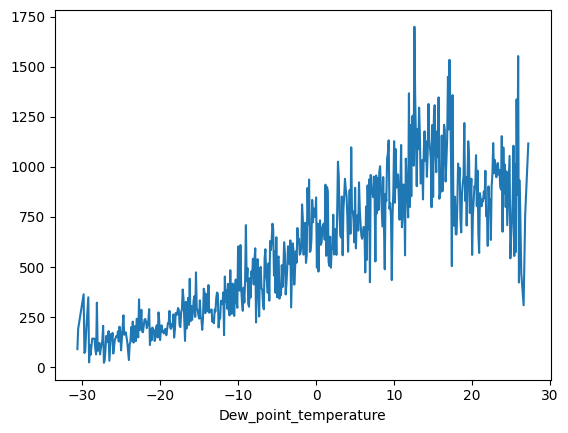

In [43]:
df.groupby("Dew_point_temperature").mean()['Rented_Bike_Count'].plot()

Here dew Temperature is similary to temperature only

**Finding relationship between Windspeed and Rented bike count**

<Axes: xlabel='Wind_speed'>

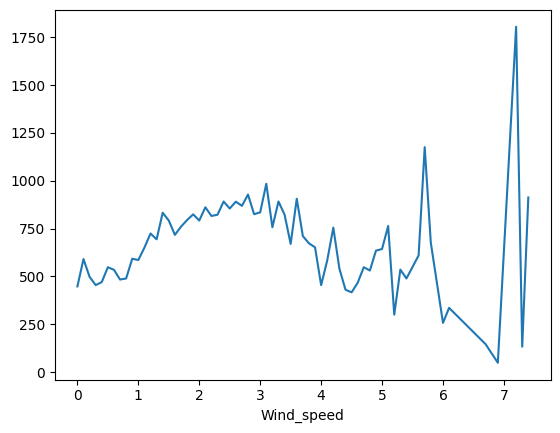

In [44]:
df.groupby("Wind_speed").mean()['Rented_Bike_Count'].plot()

* As we see when the speed of wind goes to 7 m/s, the demand for rented bike goes on increasing.
* It means people loves to travel during the temperature is likly windy

**Finding relationship between Snowfall and Rented bike count**

<Axes: xlabel='Snowfall'>

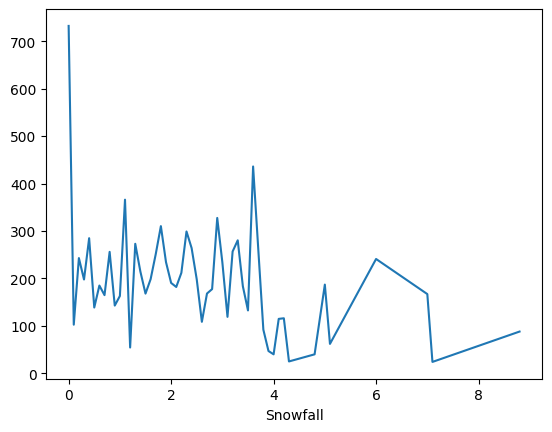

In [45]:
df.groupby("Snowfall").mean()['Rented_Bike_Count'].plot()

As we see from the above chart as the showfall get more than 4 cm of snow, peoples avoid to rent the bike or demand of rented bikes goes on decresing.

**Finding relationship between Rainfall and Rented bike count**

<Axes: xlabel='Rainfall'>

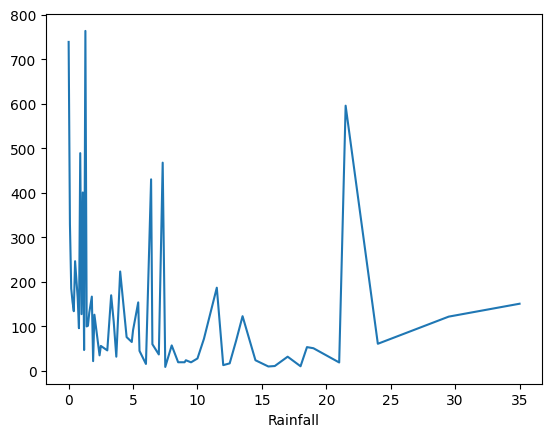

In [46]:
df.groupby("Rainfall").mean()['Rented_Bike_Count'].plot()

We can see from the above plot that even if it rains a lot the demand of of rent bikes is not decreasing, here for example even if we have 20 mm of rain there is a big peak of rented bikes

**Finding relationship between Solar Radiation and Rented bike count**

<Axes: xlabel='Solar_Radiation'>

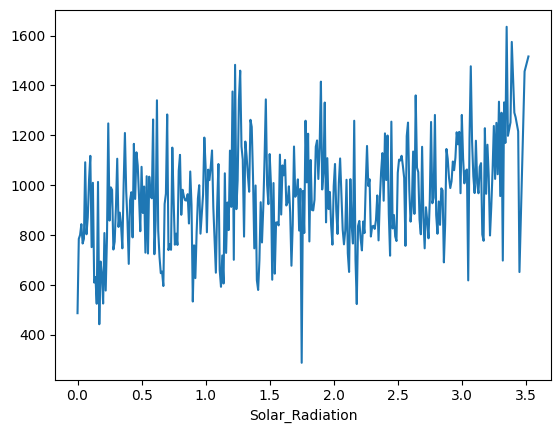

In [47]:
df.groupby("Solar_Radiation").mean()['Rented_Bike_Count'].plot()

* As we see from the about data As Solar Radiation increase the demand for rented bike also goes on increasing.
* It means people loves to ride bike during Solar Radiation

#**Regression Plot**

* Regression plots as the name suggests creates a regression line between 2 parameters and helps to visualize their linear relationships.***

* he regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analyses.

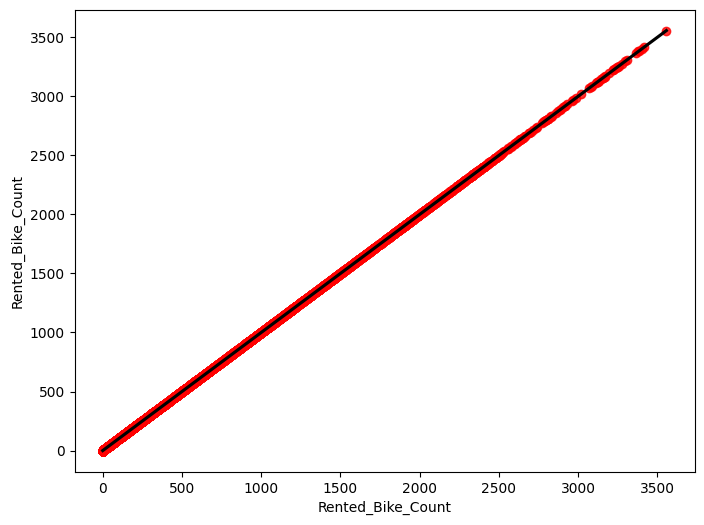

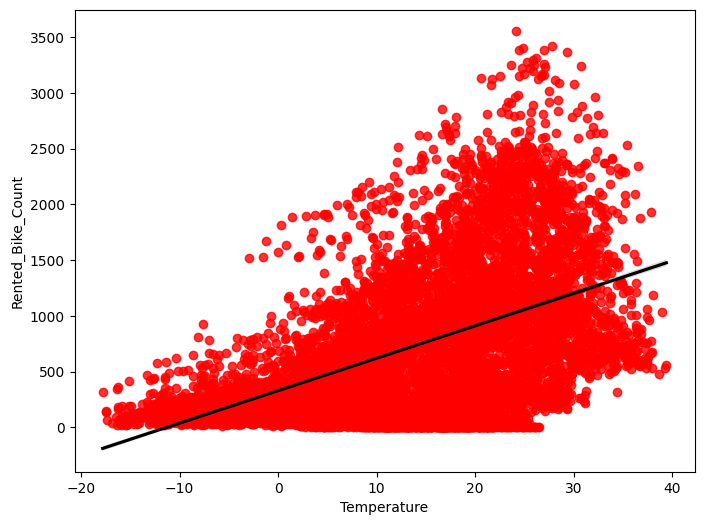

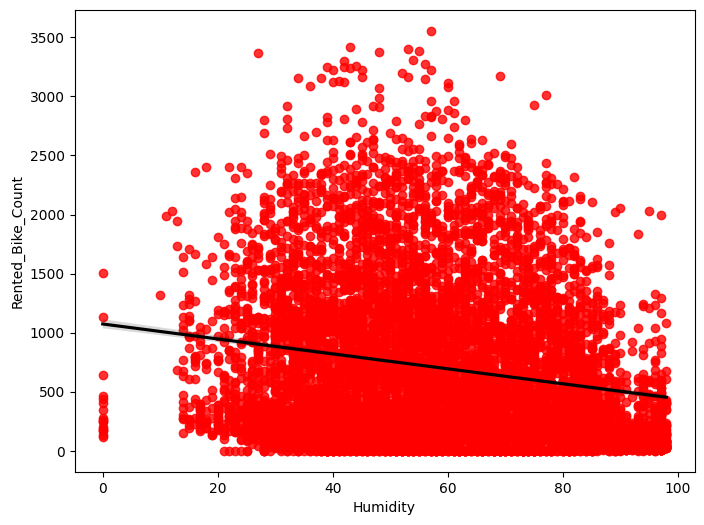

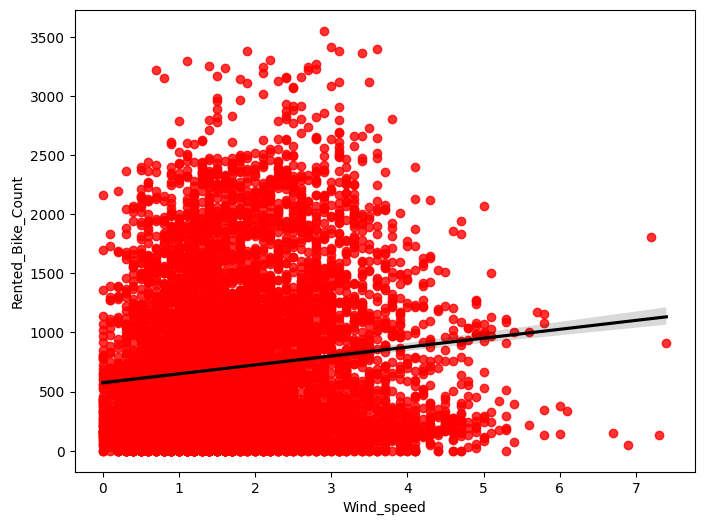

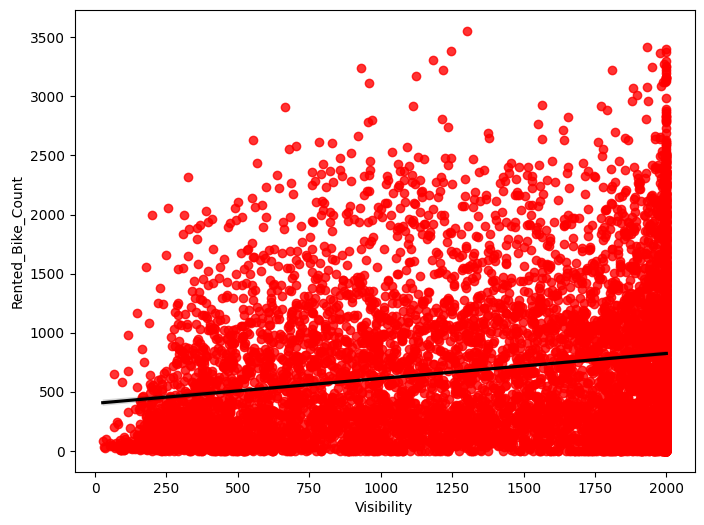

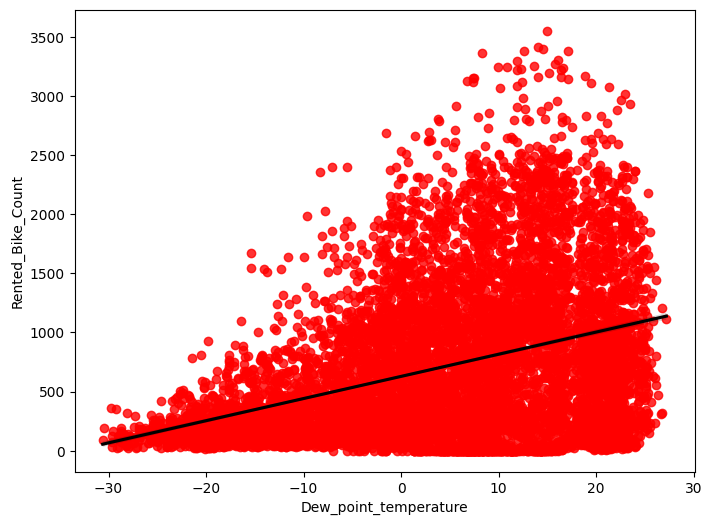

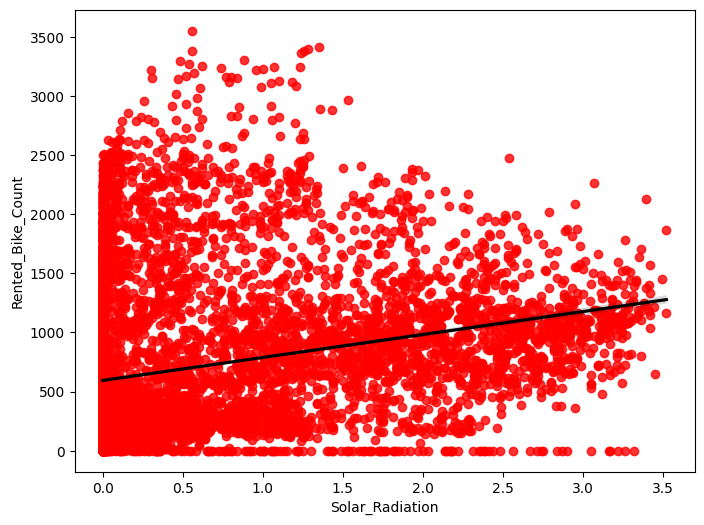

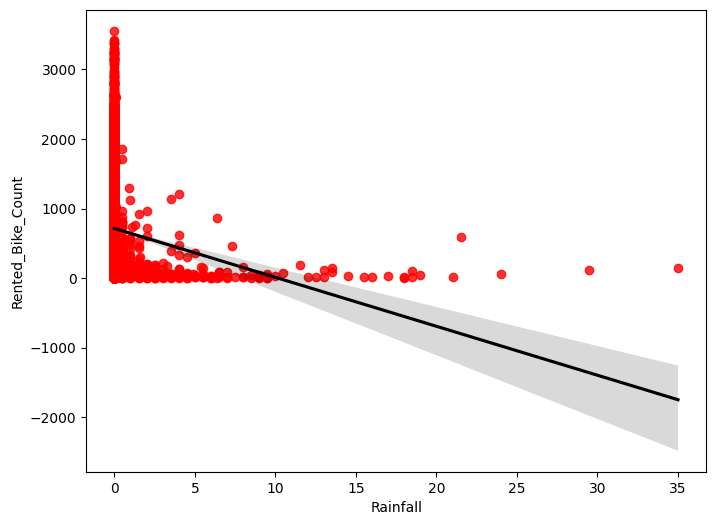

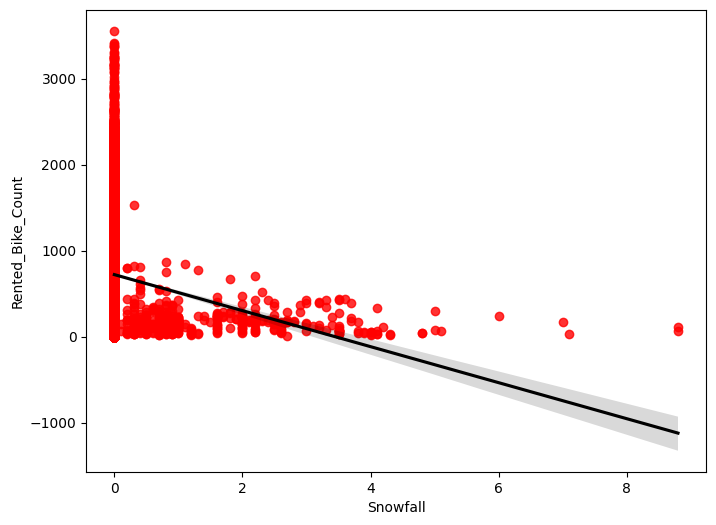

In [48]:
# Here we know that in regression model we use nummerical columns

for col in num_col_index:
  plt.figure(figsize=(8,6))
  sns.regplot(x=df[col], y='Rented_Bike_Count', data=df, scatter_kws={"color":'Red'}, line_kws={"color":"Black"})


* From this we come know that features like "Snowfall", "Rainfall" and "Humidity" has negative correlationship.

--- It means as this features will increase rented Bike count decreases.
* And "Dew_point_temperatur", "Solar_Radition", "Temperature","Wind_speed", "Visibility" are the column how has positive correlation

--- It means as this features will increase rented Bike count also increase.

*Now we will check for outlier*
*And skewness of our data*

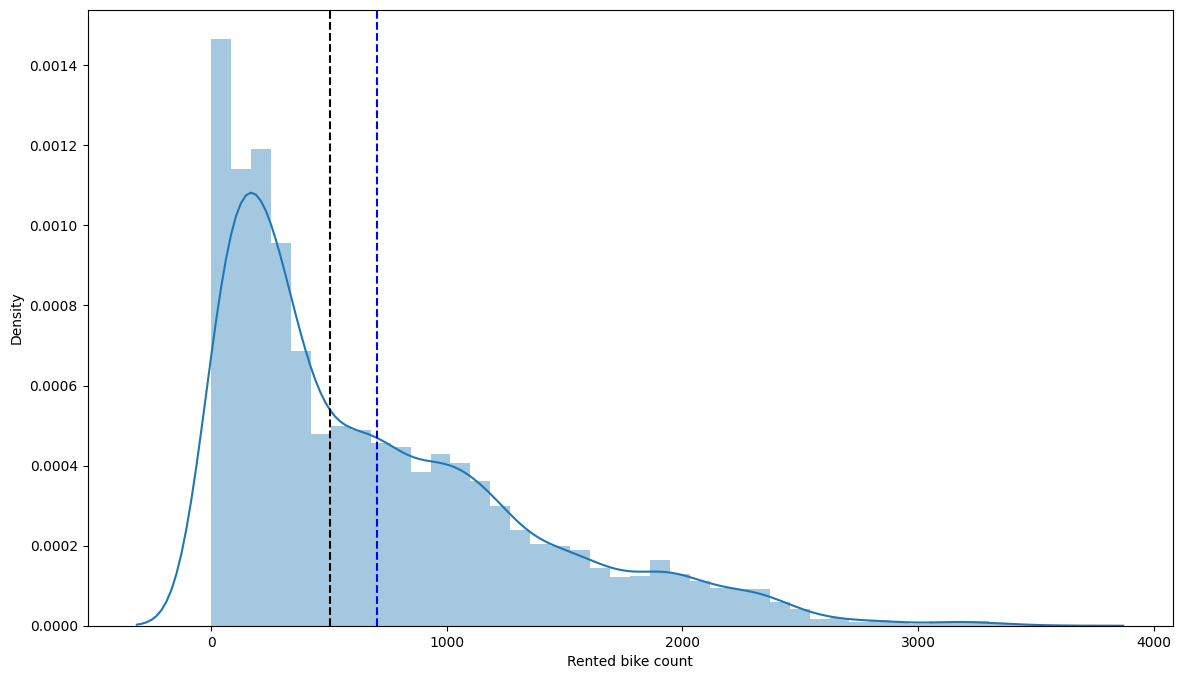

In [49]:
# now here will place one mean line and one median line to see our data

plt.figure(figsize=(14,8))
plt.xlabel("Rented bike count")
plt.ylabel("Density")

ax=sns.distplot(x=df['Rented_Bike_Count'], hist=True)
ax.axvline(df['Rented_Bike_Count'].mean(), linestyle='--', color='Blue')
ax.axvline(df['Rented_Bike_Count'].median(), linestyle='--', color='Black')
plt.show()

In [50]:
# Here we get that our data is left screw

Now well check how much outlier data we have

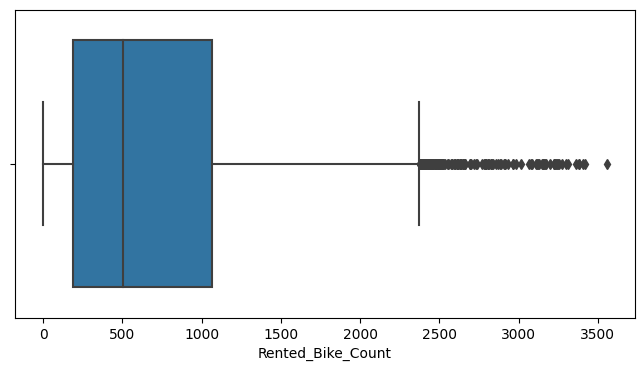

In [51]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['Rented_Bike_Count'])
plt.show()

*   As we see there are so much of outliers avalible in our data.
*   And along with that we also come to know that our data is left screw

#**So for left screw data we can use squre-root method for normalize our data**

Now,
*   Normalize our data due to which it will remove outliers
*   It is also refered as data pre-processing
*   It is an basic element of Data mining




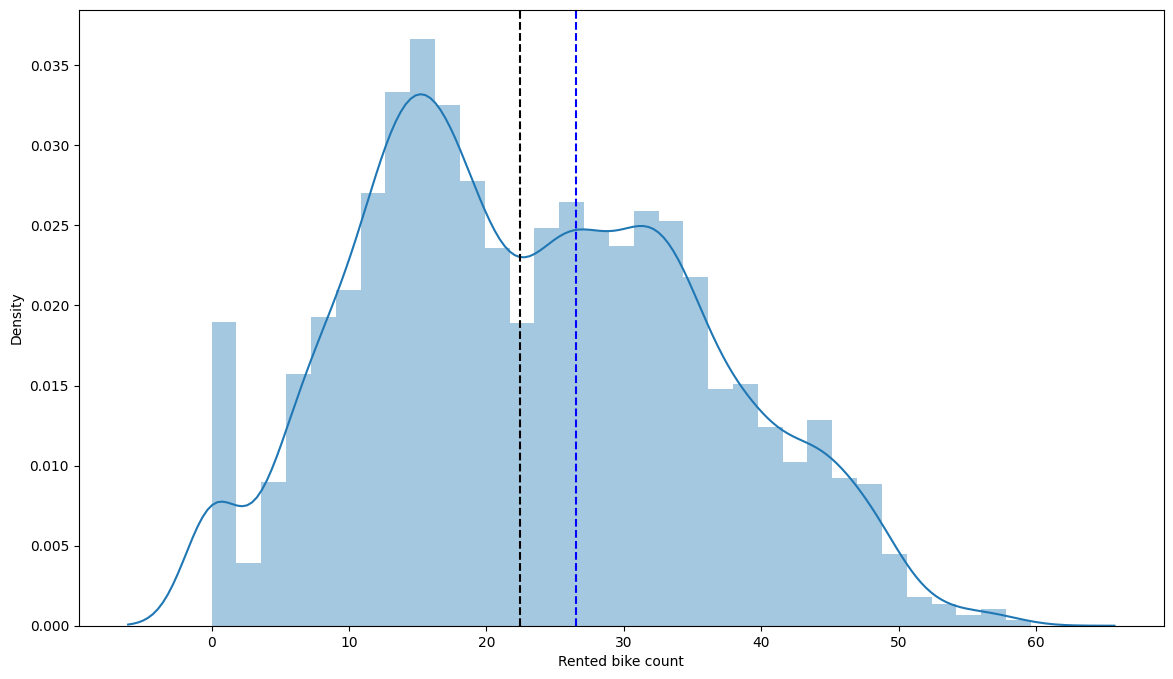

In [52]:
# Normalize our data by squre-root method

plt.figure(figsize=(14,8))
plt.xlabel("Rented bike count")
plt.ylabel("Density")

ax=sns.distplot(x=np.sqrt(df['Rented_Bike_Count']), hist=True)
ax.axvline(np.sqrt(df['Rented_Bike_Count'].mean()), linestyle='--', color='Blue')
ax.axvline(np.sqrt(df['Rented_Bike_Count'].median()), linestyle='--', color='Black')
plt.show()

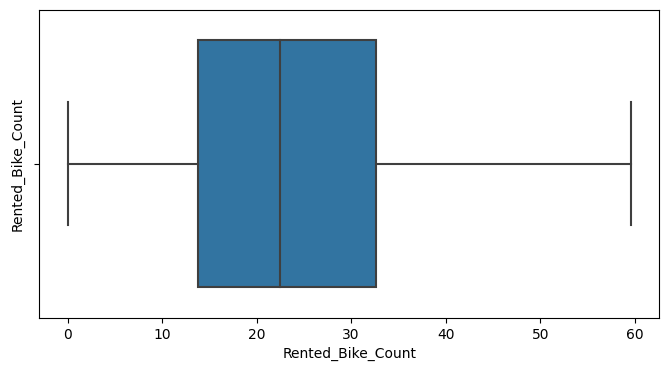

In [53]:
plt.figure(figsize=(8,4))
plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=np.sqrt(df['Rented_Bike_Count']))
plt.show()

Now our data not has outlier

In [54]:
# checking corelation between our data
df.corr()

Rented_Bike_Count  Temperature  Humidity  Wind_speed  \
Rented_Bike_Count               1.000000     0.538558 -0.199780    0.121108   
Temperature                     0.538558     1.000000  0.159371   -0.036252   
Humidity                       -0.199780     0.159371  1.000000   -0.336683   
Wind_speed                      0.121108    -0.036252 -0.336683    1.000000   
Visibility                      0.199280     0.034794 -0.543090    0.171507   
Dew_point_temperature           0.379788     0.912798  0.536894   -0.176486   
Solar_Radiation                 0.261837     0.353505 -0.461919    0.332274   
Rainfall                       -0.123074     0.050282  0.236397   -0.019674   
Snowfall                       -0.141804    -0.218405  0.108183   -0.003554   

                       Visibility  Dew_point_temperature  Solar_Radiation  \
Rented_Bike_Count        0.199280               0.379788         0.261837   
Temperature              0.034794               0.912798         0.353505   
Humidity                -0.543090               0.536894        -0.461919   
Wind_speed               0.171507              -0.176486         0.332274   
Visibility               1.000000              -0.176630         0.149738   
Dew_point_temperature   -0.176630               1.000000         0.094381   
Solar_Radiation          0.149738               0.094381         1.000000   
Rainfall                -0.167629               0.125597        -0.074290   
Snowfall                -0.121695              -0.150887        -0.072301   

                       Rainfall  Snowfall  
Rented_Bike_Count     -0.123074 -0.141804  
Temperature            0.050282 -0.218405  
Humidity               0.236397  0.108183  
Wind_speed            -0.019674 -0.003554  
Visibility            -0.167629 -0.121695  
Dew_point_temperature  0.125597 -0.150887  
Solar_Radiation       -0.074290 -0.072301  
Rainfall               1.000000  0.008500  
Snowfall               0.008500  1.000000

#**Checking for correlation between variables**

In [55]:
# checking for OLS(Ordinary Least Square):
# get X, y

X = df.drop("Rented_Bike_Count", axis=1)
y = df['Rented_Bike_Count']

In [56]:
# Add constant columns

import statsmodels.api as sm
X = sm.add_constant(X)
X

const Hour  Temperature  Humidity  Wind_speed  Visibility  \
0       1.0    0         -5.2        37         2.2        2000   
1       1.0    1         -5.5        38         0.8        2000   
2       1.0    2         -6.0        39         1.0        2000   
3       1.0    3         -6.2        40         0.9        2000   
4       1.0    4         -6.0        36         2.3        2000   
...     ...  ...          ...       ...         ...         ...   
8755    1.0   19          4.2        34         2.6        1894   
8756    1.0   20          3.4        37         2.3        2000   
8757    1.0   21          2.6        39         0.3        1968   
8758    1.0   22          2.1        41         1.0        1859   
8759    1.0   23          1.9        43         1.3        1909   

      Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall Seasons  \
0                     -17.6              0.0       0.0       0.0  Winter   
1                     -17.6              0.0       0.0       0.0  Winter   
2                     -17.7              0.0       0.0       0.0  Winter   
3                     -17.6              0.0       0.0       0.0  Winter   
4                     -18.6              0.0       0.0       0.0  Winter   
...                     ...              ...       ...       ...     ...   
8755                  -10.3              0.0       0.0       0.0  Autumn   
8756                   -9.9              0.0       0.0       0.0  Autumn   
8757                   -9.9              0.0       0.0       0.0  Autumn   
8758                   -9.8              0.0       0.0       0.0  Autumn   
8759                   -9.3              0.0       0.0       0.0  Autumn   

         Holiday Functioning_Day Month Weekend  
0     No Holiday             Yes    12       0  
1     No Holiday             Yes    12       0  
2     No Holiday             Yes    12       0  
3     No Holiday             Yes    12       0  
4     No Holiday             Yes    12       0  
...          ...             ...   ...     ...  
8755  No Holiday             Yes    11       0  
8756  No Holiday             Yes    11       0  
8757  No Holiday             Yes    11       0  
8758  No Holiday             Yes    11       0  
8759  No Holiday             Yes    11       0  

[8760 rows x 15 columns]

In [57]:
X.corr()

const  Temperature  Humidity  Wind_speed  Visibility  \
const                    NaN          NaN       NaN         NaN         NaN   
Temperature              NaN     1.000000  0.159371   -0.036252    0.034794   
Humidity                 NaN     0.159371  1.000000   -0.336683   -0.543090   
Wind_speed               NaN    -0.036252 -0.336683    1.000000    0.171507   
Visibility               NaN     0.034794 -0.543090    0.171507    1.000000   
Dew_point_temperature    NaN     0.912798  0.536894   -0.176486   -0.176630   
Solar_Radiation          NaN     0.353505 -0.461919    0.332274    0.149738   
Rainfall                 NaN     0.050282  0.236397   -0.019674   -0.167629   
Snowfall                 NaN    -0.218405  0.108183   -0.003554   -0.121695   

                       Dew_point_temperature  Solar_Radiation  Rainfall  \
const                                    NaN              NaN       NaN   
Temperature                         0.912798         0.353505  0.050282   
Humidity                            0.536894        -0.461919  0.236397   
Wind_speed                         -0.176486         0.332274 -0.019674   
Visibility                         -0.176630         0.149738 -0.167629   
Dew_point_temperature               1.000000         0.094381  0.125597   
Solar_Radiation                     0.094381         1.000000 -0.074290   
Rainfall                            0.125597        -0.074290  1.000000   
Snowfall                           -0.150887        -0.072301  0.008500   

                       Snowfall  
const                       NaN  
Temperature           -0.218405  
Humidity               0.108183  
Wind_speed            -0.003554  
Visibility            -0.121695  
Dew_point_temperature -0.150887  
Solar_Radiation       -0.072301  
Rainfall               0.008500  
Snowfall               1.000000

#**Heatmap**

* It is often desirable to show data which depends on two independent variables as a color coded image plot. This is often referred to as a heatmap.
* If the data is categorical, this would be called a categorical heatmap. Matplotlib's imshow function makes production of such plots particularly easy.


<Axes: >

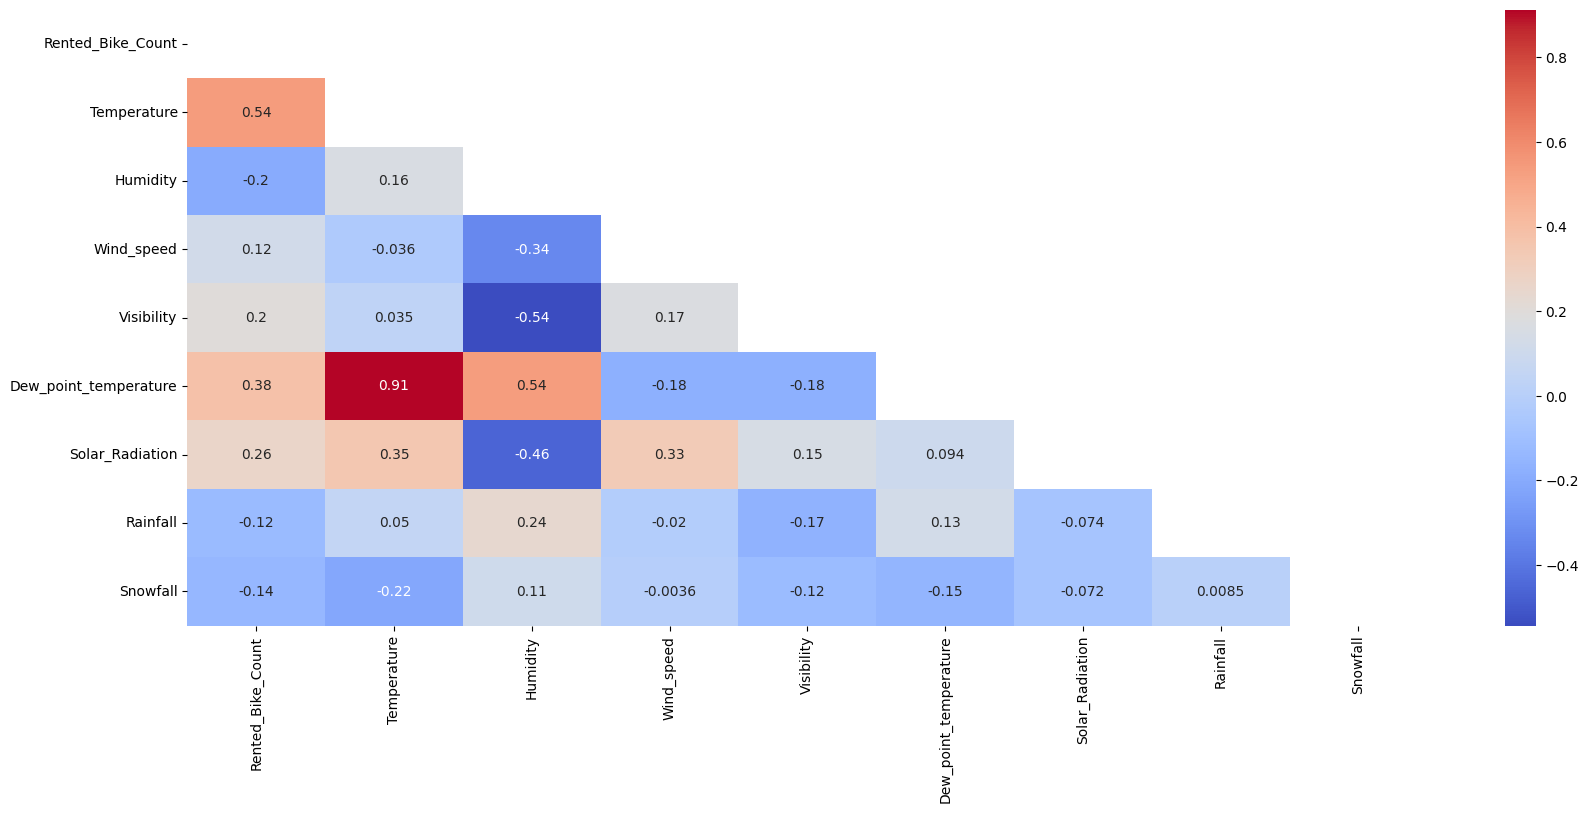

In [58]:
# here we will plot corelation matrix heatmap

plt.figure(figsize=(20,8))
corre = df.corr()
mask = np.triu(np.ones_like(corre, dtype=bool))

sns.heatmap((corre), mask=mask, annot=True, cmap='coolwarm')

So here we come to know:-


#  Positive correlated variables are:


1.   Temperature
2.   Drew_point_temperaturee
3.   Solar_Radiation


# Negative correlated variables are:
1.  Humidity
2.  Rainfall



So from the above data we come to know that "Dew_point_temperature" and "Temperature" has high correlation so we are going to drop "Dew_point_temperature" column

In [59]:
df = df.drop("Dew_point_temperature", axis=1)
df.head()

Rented_Bike_Count Hour  Temperature  Humidity  Wind_speed  Visibility  \
0                254    0         -5.2        37         2.2        2000   
1                204    1         -5.5        38         0.8        2000   
2                173    2         -6.0        39         1.0        2000   
3                107    3         -6.2        40         0.9        2000   
4                 78    4         -6.0        36         2.3        2000   

   Solar_Radiation  Rainfall  Snowfall Seasons     Holiday Functioning_Day  \
0              0.0       0.0       0.0  Winter  No Holiday             Yes   
1              0.0       0.0       0.0  Winter  No Holiday             Yes   
2              0.0       0.0       0.0  Winter  No Holiday             Yes   
3              0.0       0.0       0.0  Winter  No Holiday             Yes   
4              0.0       0.0       0.0  Winter  No Holiday             Yes   

  Month Weekend  
0    12       0  
1    12       0  
2    12       0  
3    12       0  
4    12       0

#**Creating dummy variables**

A dataset may contain various type of values, sometimes it consists of categorical values. So, in-order to use those categorical value for programming efficiently we create dummy variables.

In [60]:
from pandas.core.arrays import categorical
# Assign all the categorical columns to it

categorical_col = list(df.select_dtypes(['object',"category"]).columns)
categorical_col_index = pd.Index(categorical_col)
categorical_col_index

Index(['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'Month', 'Weekend'], dtype='object')

#**One Hot Encoding(OHE):**

* One hot encoding is a process of converting categorical data variables so they can be provided to machine learning algorithms to improve predictions.
* One hot encoding allows the representation of categorical data to be more expressive. Many machine learning algorithms cannot work with categorical data directly. The categories must be converted into numbers. This is required for both input and output variables that are categorical.

In [61]:
df_copu = df

In [62]:
#creat a copy
df_copy = df

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

In [63]:
for col in categorical_col_index:
    df_copy = one_hot_encoding(df_copy, col)
df_copy.head()

Rented_Bike_Count  Temperature  Humidity  Wind_speed  Visibility  \
0                254         -5.2        37         2.2        2000   
1                204         -5.5        38         0.8        2000   
2                173         -6.0        39         1.0        2000   
3                107         -6.2        40         0.9        2000   
4                 78         -6.0        36         2.3        2000   

   Solar_Radiation  Rainfall  Snowfall  Hour_1  Hour_2  ...  Month_4  Month_5  \
0              0.0       0.0       0.0       0       0  ...        0        0   
1              0.0       0.0       0.0       1       0  ...        0        0   
2              0.0       0.0       0.0       0       1  ...        0        0   
3              0.0       0.0       0.0       0       0  ...        0        0   
4              0.0       0.0       0.0       0       0  ...        0        0   

   Month_6  Month_7  Month_8  Month_9  Month_10  Month_11  Month_12  Weekend_1  
0        0        0        0        0         0         0         1          0  
1        0        0        0        0         0         0         1          0  
2        0        0        0        0         0         0         1          0  
3        0        0        0        0         0         0         1          0  
4        0        0        0        0         0         0         1          0  

[5 rows x 48 columns]

In [64]:
df_copy.shape

(8760, 48)

#**Model traning**

###Do train Test split for regression models

* Train test split technique is used to estimate the performance of machine learning algorithms which are used to make predictions on data not used to train the model.
* Train Test split technique splits our data into 2 parts traning and testing due to which we can use it to train our model.

In [65]:
# Assign the value of X and Y

X = df_copy.drop("Rented_Bike_Count", axis=1)
y = np.sqrt(df_copy['Rented_Bike_Count'])

In [66]:
# do train test split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6570, 47)
(2190, 47)
(6570,)
(2190,)


In [68]:
df_copy.describe().columns

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'Hour_1',
       'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8',
       'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14',
       'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20',
       'Hour_21', 'Hour_22', 'Hour_23', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'Holiday_No Holiday', 'Functioning_Day_Yes',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12', 'Weekend_1'],
      dtype='object')

#**Applying Algorithms**

###**Linear Regression**

Linear regression uses a linear approach to model the relationship between independent and dependent variables. In simple words its a best fit line drawn over the values of independent variables and dependent variable. In case of single variable, the formula is same as straight line equation having an intercept and slope.

$$ \text{y_pred} = \beta_0 + \beta_1x$$

where $$\beta_0 \text{ and } \beta_1$$ are intercept and slope respectively.

In case of multiple features the formula translates into:

$$ \text{y_pred} = \beta_0 + \beta_1x_1 + \beta_2x_2 +\beta_3x_3 +.....$$

where x_1,x_2,x_3 are the features values and
$$\beta_0,\beta_1,\beta_2.....$$
 are weights assigned to each of the features. These become the parameters which the algorithm tries to learn using Gradient descent.

Gradient descent is the process by which the algorithm tries to update the parameters using  a loss function . Loss function is nothing but the diffence between the actual values and predicted values(aka error or residuals). There are different types of loss function but this is the simplest one. Loss function summed over all observation gives the cost functions. The role of gradient descent is to update the parameters till the cost function is minimized i.e., a global minima is reached. It uses a hyperparameter 'alpha' that gives a weightage to the cost function and decides on how big the steps to take. Alpha is called as the learning rate. It is always necesarry to keep an optimal value of alpha as high and low values of alpha might make the gradient descent overshoot or get stuck at a local minima. There are also some basic assumptions that must be fulfilled before implementing this algorithm. They are:

1. No multicollinearity in the dataset.

2. Independent variables should show linear relationship with dv.

3. Residual mean should be 0 or close to 0.

4. There should be no heteroscedasticity i.e., variance should be constant along the line of best fit.



Let us now implement our first model.
We will be using LinearRegression from scikit library.

In [69]:
# import package

from sklearn.linear_model import LinearRegression

In [70]:
# Fit the model

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [71]:
# Get the score

reg.score(X_train, y_train)

0.7722101548255267

In [72]:
# Check for coefficient

reg.coef_

array([ 5.11538263e-01, -1.27236196e-01, -2.90122073e-02,  9.90615715e-04,
        8.89701409e-01, -1.48171446e+00, -8.13629988e-02, -2.04211065e+00,
       -4.95822637e+00, -7.23630435e+00, -9.51882072e+00, -9.04457949e+00,
       -4.03213994e+00,  2.27462862e+00,  7.54438892e+00,  1.25491521e+00,
       -3.27047269e+00, -3.46014138e+00, -2.74135788e+00, -2.96341191e+00,
       -3.18317912e+00, -1.92136354e+00,  1.11918595e-01,  3.83216182e+00,
        1.02397844e+01,  6.78230326e+00,  6.08102846e+00,  6.20280481e+00,
        5.04597766e+00,  1.46736086e+00, -4.81648861e-01, -1.26348263e+00,
       -4.80391365e+00,  3.51130869e+00,  2.82758278e+01, -8.13449897e-01,
       -1.53946964e+00, -6.75094331e-01,  1.73291511e+00,  4.41327425e+00,
       -1.71047504e+00, -3.96628184e+00,  6.27209321e-01,  3.28833588e+00,
        2.63349995e+00,  2.07210333e+00, -1.42458875e+00])

In [73]:
# Get predicted value of x-test and x-train

y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)
print(y_train_pred.shape)
print(y_test_pred.shape)
print(y_test.shape)

(6570,)
(2190,)
(2190,)


In [74]:
# Import package

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

* The mean squared error (MSE) tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them.
It’s called the mean squared error as you’re finding the average of a set of errors. The lower the MSE, the better the forecast.

* MSE formula = (1/n) * Σ(actual – forecast)2
Where:

*   n = number of items,
* Σ = summation notation,
* Actual = original or observed y-value,
* Forecast = y-value from regression.

* Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors).

* Mean Absolute Error (MAE) are metrics used to evaluate a Regression Model. ... Here, errors are the differences between the predicted values (values predicted by our regression model) and the actual values of a variable.

* R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

* Formula for R-Squared
\begin{aligned} &\text{R}^2 = 1 - \frac{ \text{Unexplained Variation} }{ \text{Total Variation} } \\ \end{aligned}
​
  
* R
2
 =1−
Total Variation
Unexplained Variation
​

* Adjusted R-squared is a modified version of R-squared that has been adjusted for the number of predictors in the model.
​


In [75]:



# Calculation for train sets

# Calculate MSE
MSE_lr= mean_squared_error((y_train), (y_train_pred))
print("MSE :",MSE_lr)


# Calculate RMSE

RMSE_lr = np.sqrt(MSE_lr)
print("RMSE", RMSE_lr)



# Calculate MAE

MAE_lr = mean_absolute_error(y_train, y_train_pred)
print("MAE", MAE_lr)


# Calculate R2_Score

R2_lr = r2_score(y_train, y_train_pred)
print("R2", R2_lr)


# Calculate Ajusted R2

Adjusted_R2_lr =1-(1-R2_lr)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2", Adjusted_R2_lr)


MSE : 35.07751288189293
RMSE 5.9226271942350825
MAE 4.474024092996784
R2 0.7722101548255267
Adjusted R2 0.7672119649454145


* Here we get r2 score value 0.7722 that means our model is performing good on this data variance.
* Lets save it into different data set so after doing all the algorithm we can compair it.

In [76]:

dict1 = {"Model":"Linear Regression",
         "MAE": round((MAE_lr),3),
         "MSE": round((MSE_lr),3),
         "RMSE": round((RMSE_lr),3),
         "R2_score": round((R2_lr),3),
         "Adjusted_R2": round((Adjusted_R2_lr),3)
         }

In [77]:
# Storing the train set metrics value in data frame

traning_set = pd.DataFrame(dict1, index=[1])
traning_set

Model    MAE     MSE   RMSE  R2_score  Adjusted_R2
1  Linear Regression  4.474  35.078  5.923     0.772        0.767

In [78]:
# Calculation for test sets

# Calculate MSE
MSE_lr = mean_squared_error(y_test, y_test_pred)
print("MSE", MSE_lr)


# Calculate RMSE

RMSE_lr = np.sqrt(MSE_lr)
print("RMSE", RMSE_lr)



# Calculate MAE

MAE_lr = mean_absolute_error(y_test,  y_test_pred)
print("MAE", MAE_lr)


# Calculate R2_Score

R2_lr = r2_score(y_test, y_test_pred)
print("R2", R2_lr)


# Calculate Ajusted R2

Adjusted_R2_lr =1-(1-R2_lr)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2", Adjusted_R2_lr)


MSE 33.27533089591926
RMSE 5.76847734639907
MAE 4.410178475318178
R2 0.7893518482962683
Adjusted R2 0.7847297833429184


* Here we get r2 score value 0.7893 that means our model is performing good on this data variance.


In [79]:
# Storing the test set metrics value in data frame

dict2 = {"Model":"Linear Regression",
         "MAE": round((MAE_lr),3),
         "MSE": round((MSE_lr),3),
         "RMSE": round((RMSE_lr),3),
         "R2_score": round((R2_lr),3),
         "Adjusted_R2": round((Adjusted_R2_lr),3)
         }

In [80]:
# storing the test set metrics value in a dataframe for later comparison

test_set = pd.DataFrame(dict2, index=[1])

In [81]:
print(y_test_pred.shape)
print(y_test.shape)

(2190,)
(2190,)


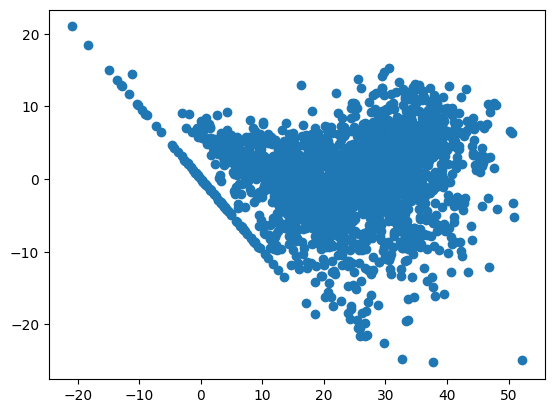

In [82]:
# Heteroscadacity

plt.scatter((y_test_pred),(y_test)-(y_test_pred))

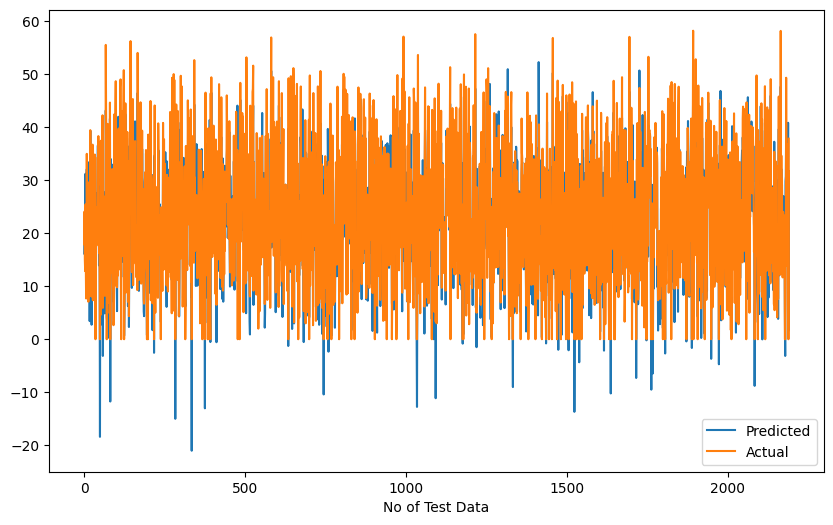

In [83]:
# plot the figure

plt.figure(figsize=(10,6))
plt.plot(y_test_pred)
plt.plot(np.array(y_test))
plt.legend(['Predicted',"Actual"])
plt.xlabel("No of Test Data")
plt.show()

#**Lasso Regression**

In [84]:
# Lasso regression implimentation

lasso = Lasso(alpha = 1.0, max_iter=3000)
lasso.fit(X_train, y_train)
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.40519624904934015
0.3873692800799008


In [85]:
# get predicted values for x_train and X_test

y_pred_train_lasso = lasso.predict(X_train)
y_pred_test_lasso = lasso.predict(X_test)

In [86]:
# Calculation for train sets

# Calculate MSE
MSE_lasso= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_lasso)


# Calculate RMSE

RMSE_lasso = np.sqrt(MSE_lasso)
print("RMSE", RMSE_lasso)



# Calculate MAE

MAE_lasso = mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE", MAE_lasso)


# Calculate R2_Score

R2_lasso = r2_score(y_train, y_pred_train_lasso)
print("R2", R2_lasso)


# Calculate Ajusted R2

Adjusted_R2_lasso =1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 91.59423336097032
RMSE 9.570487623991283
MAE 7.255041571454952
R2 0.40519624904934015
Adjusted R2 : 0.3921449996120475


* Here we get r2 score value 0.4053 that means our model is not able to capture more data variance

In [87]:
dict1 = {"Model":"Lasso Regression",
         "MAE": round((MAE_lasso),3),
         "MSE": round((MSE_lasso),3),
         "RMSE": round((RMSE_lasso),3),
         "R2_score": round((R2_lasso),3),
         "Adjusted_R2": round((Adjusted_R2_lasso),3)
         }


In [88]:
# storing the train set metrics value in a dataframe for later comparison

traning_set = traning_set.append(dict1, ignore_index=True)
traning_set

Model    MAE     MSE   RMSE  R2_score  Adjusted_R2
0  Linear Regression  4.474  35.078  5.923     0.772        0.767
1   Lasso Regression  7.255  91.594  9.570     0.405        0.392

In [89]:
# Calculation for test sets

# Calculate MSE
MSE_lr = mean_squared_error(y_test, y_pred_test_lasso)
print("MSE", MSE_lr)


# Calculate RMSE

RMSE_lr = np.sqrt(MSE_lr)
print("RMSE", RMSE_lr)



# Calculate MAE

MAE_lr = mean_absolute_error(y_test,  y_pred_test_lasso)
print("MAE", MAE_lr)


# Calculate R2_Score

R2_lr = r2_score(y_test, y_pred_test_lasso)
print("R2", R2_lr)


# Calculate Ajusted R2

Adjusted_R2_l=(1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2", Adjusted_R2_l)


MSE 96.7750714044618
RMSE 9.837432155011886
MAE 7.455895061963607
R2 0.3873692800799008
Adjusted R2 0.37392686932535146


* Here we get r2 score value 0.3873 that means our model is not able to capture more data variance.

In [90]:
dict2 = {"Model":"Lasso Regression",
         "MAE": round((MAE_lr),3),
         "MSE": round((MSE_lr),3),
         "RMSE": round((RMSE_lr),3),
         "R2_score": round((R2_lr),3),
         "Adjusted_R2": round((Adjusted_R2_l),3)
         }

In [91]:
# storing the test set metrics value in a dataframe for later comparison

test_set = test_set.append(dict2, ignore_index=True)
test_set

Model    MAE     MSE   RMSE  R2_score  Adjusted_R2
0  Linear Regression  4.410  33.275  5.768     0.789        0.785
1   Lasso Regression  7.456  96.775  9.837     0.387        0.374

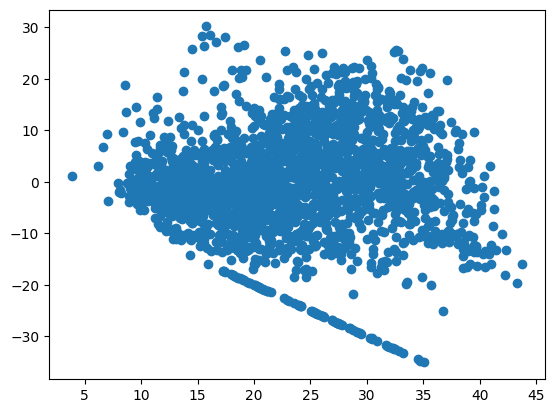

In [92]:
plt.scatter((y_pred_test_lasso),(y_test-y_pred_test_lasso))

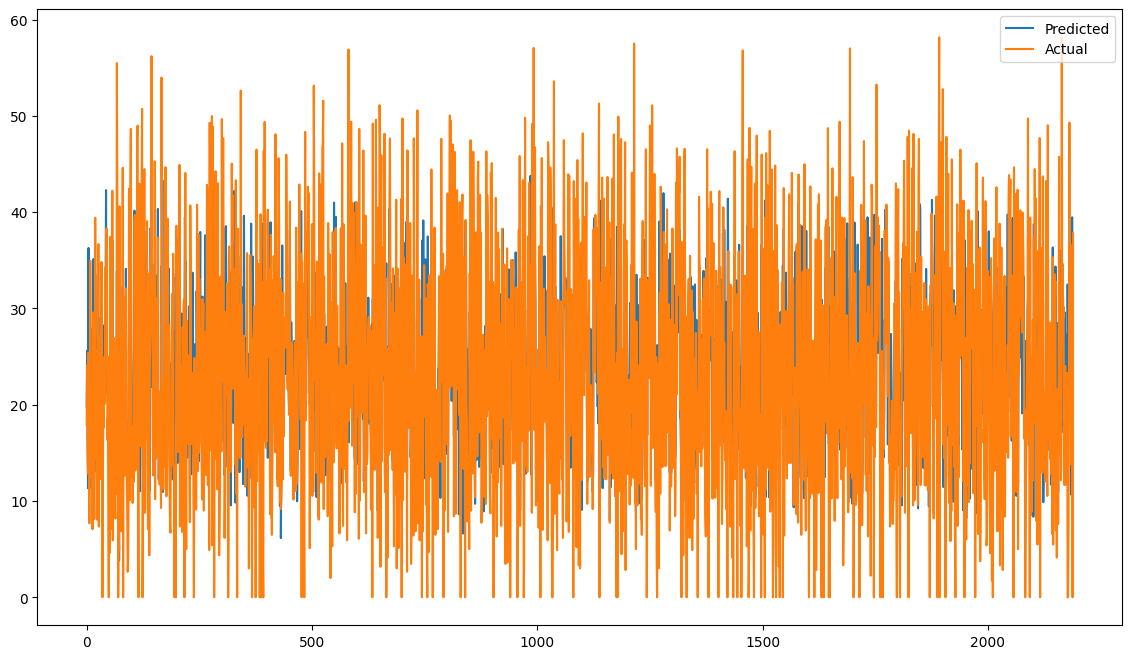

In [93]:
# plot figure

plt.figure(figsize=(14,8))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array(y_test))
plt.legend(['Predicted', 'Actual'])
plt.show()

#**Ridge Regressor**

In [94]:
# Ridge Regression implimentation

from sklearn.linear_model import Ridge

In [95]:
ridge = Ridge(alpha=0.1)

# fit the model
ridge.fit(X_train, y_train)

Ridge(alpha=0.1)

In [96]:
# Checking for score
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.7722100789802107
0.7893426477812578


In [97]:
# get x_train, x_test predicted values

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

In [98]:
# Calculation for train sets

# Calculate MSE
MSE_la= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_la)


# Calculate RMSE

RMSE_la = np.sqrt(MSE_la)
print("RMSE", RMSE_la)



# Calculate MAE

MAE_la = mean_absolute_error(y_train, y_pred_train)
print("MAE", MAE_la)


# Calculate R2_Score

R2_la = r2_score(y_train, y_pred_train)
print("R2", R2_la)


# Calculate Ajusted R2

Adjusted_R2_l=(1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2", Adjusted_R2_l)

MSE : 35.07752456136463
RMSE 5.922628180239296
MAE 4.474125776125379
R2 0.7722100789802107
Adjusted R2 0.7847203809491939




* Here we get r2 score value 0.7722 that means our model is performing good on this data variance.

In [99]:
# storing the train set metrics value in a dataframe for later comparison

dict1 = {"Model":"Ridge Regression",
         "MAE": round((MAE_la),3),
         "MSE": round((MSE_la),3),
         "RMSE": round((RMSE_la),3),
         "R2_score": round((R2_la),3),
         "Adjusted_R2": round((Adjusted_R2_l),3)
         }

In [100]:
traning_set = traning_set.append(dict1, ignore_index=True)
traning_set

Model    MAE     MSE   RMSE  R2_score  Adjusted_R2
0  Linear Regression  4.474  35.078  5.923     0.772        0.767
1   Lasso Regression  7.255  91.594  9.570     0.405        0.392
2   Ridge Regression  4.474  35.078  5.923     0.772        0.785

In [101]:
# Calculation for test sets

# Calculate MSE
MSE_la = mean_squared_error(y_test, y_pred_test)
print("MSE", MSE_la)


# Calculate RMSE

RMSE_la = np.sqrt(MSE_la)
print("RMSE", RMSE_la)



# Calculate MAE

MAE_la = mean_absolute_error(y_test,  y_pred_test)
print("MAE", MAE_la)

# Calculate R2_Score

R2_la = r2_score(y_test, y_pred_test)
print("R2", R2_la)


# Calculate Ajusted R2

Adjusted_R2_la=(1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2", Adjusted_R2_la)

MSE 33.27678426818438
RMSE 5.768603320404722
MAE 4.410414932539515
R2 0.7893426477812578
Adjusted R2 0.7847203809491939


* Here we get r2 score value 0.7893 that means our model is performing good on this data variance.

In [102]:
# storing the test set metrics value in a dataframe for later comparison

dict2 = {"Model":"Ridge Regression",
         "MAE": round((MAE_la),3),
         "MSE": round((MSE_la),3),
         "RMSE": round((RMSE_la),3),
         "R2_score": round((R2_la),3),
         "Adjusted_R2": round((Adjusted_R2_la),3)
         }

In [103]:
test_set = test_set.append(dict2, ignore_index=True)
test_set

Model    MAE     MSE   RMSE  R2_score  Adjusted_R2
0  Linear Regression  4.410  33.275  5.768     0.789        0.785
1   Lasso Regression  7.456  96.775  9.837     0.387        0.374
2   Ridge Regression  4.410  33.277  5.769     0.789        0.785

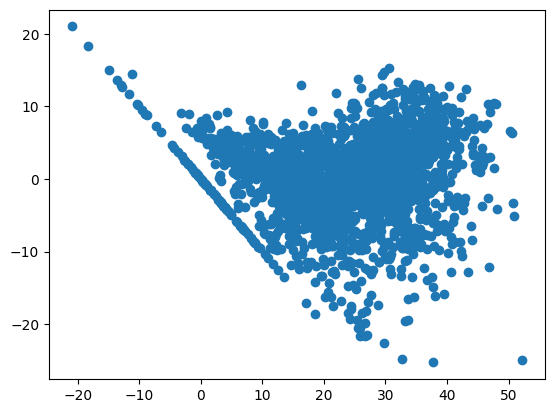

In [104]:
# Heteroscadacity
plt.scatter((y_pred_test), (y_test - y_pred_test))

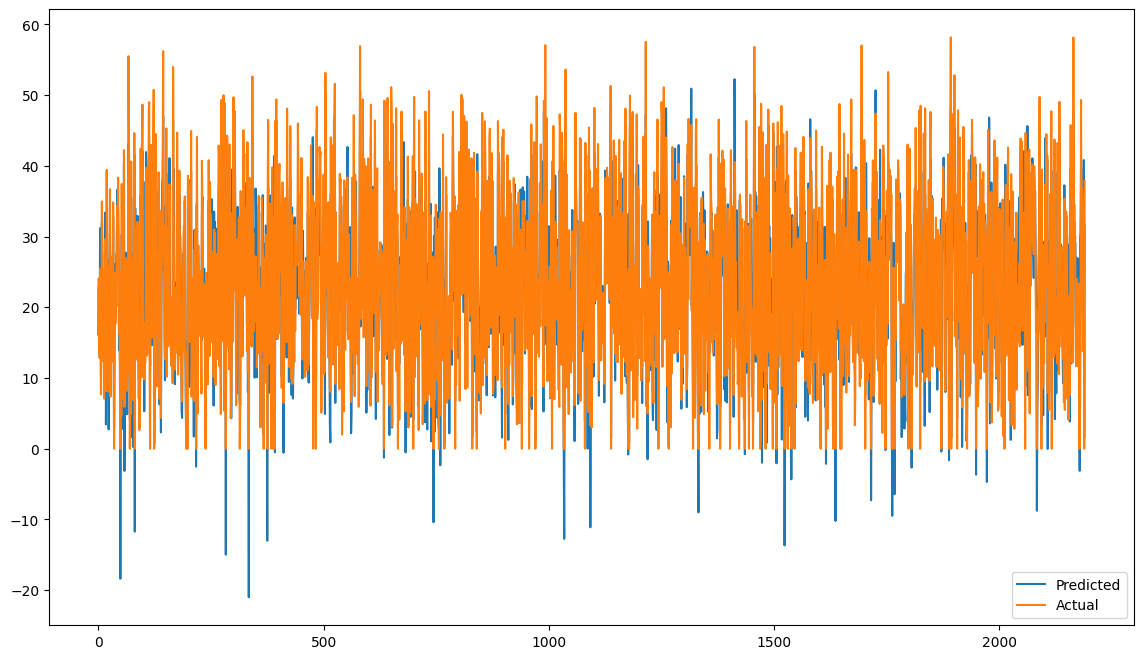

In [105]:
plt.figure(figsize=(14,8))
plt.plot(np.array(y_pred_test))
plt.plot(np.array(y_test))
plt.legend(['Predicted', "Actual"])
plt.show()

#**Elastic Net Regressor**

In [106]:
# Import package
from sklearn.linear_model import ElasticNet

In [107]:
# where in this formula we do
# a *l1 + b * l2
# alpha = a+b
# l1_ratio = a/(a+b)

elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [108]:
# fit the model

elastic.fit(X_train, y_train)

ElasticNet(alpha=0.1)

In [109]:

# checking score

elastic.score(X_train, y_train)

0.6261189054494012

In [110]:
# Get predicted values

y_pred_train = elastic.predict(X_train)
y_pred_test = elastic.predict(X_test)

In [111]:
# Calculation for train sets

# Calculate MSE
MSE_el= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_el)


# Calculate RMSE

RMSE_el = np.sqrt(MSE_el)
print("RMSE", RMSE_el)



# Calculate MAE

MAE_el = mean_absolute_error(y_train, y_pred_train)
print("MAE", MAE_el)


# Calculate R2_Score

R2_el = r2_score(y_train, y_pred_train)
print("R2", R2_el)


# Calculate Ajusted R2

Adjusted_R2_el=(1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2", Adjusted_R2_el)

MSE : 57.5742035398887
RMSE 7.587766703048315
MAE 5.792276538970546
R2 0.6261189054494012
Adjusted R2 0.6153885321484546


* Here we get r2 score value 0.6261 that means our model is performing good on this data variance.

In [112]:
# storing the train set metrics value in a dataframe for later comparison


dict1 = {"Model":"ElasticNet Regression",
         "MAE": round((MAE_el),3),
         "MSE": round((MSE_el),3),
         "RMSE": round((RMSE_el),3),
         "R2_score": round((R2_el),3),
         "Adjusted_R2": round((Adjusted_R2_el),3)
         }

In [113]:
traning_set = traning_set.append(dict1, ignore_index=True)

In [114]:
# Calculation for test sets

# Calculate MSE
MSE_el = mean_squared_error(y_test, y_pred_test)
print("MSE", MSE_el)


# Calculate RMSE

RMSE_el = np.sqrt(MSE_el)
print("RMSE", RMSE_el)



# Calculate MAE

MAE_el = mean_absolute_error(y_test,  y_pred_test)
print("MAE", MAE_el)


# Calculate R2_Score

R2_el = r2_score(y_test, y_pred_test)
print("R2", R2_el)


# Calculate Ajusted R2

Adjusted_R2_el=(1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2", Adjusted_R2_el)

MSE 59.45120536350042
RMSE 7.710460775044538
MAE 5.873612334800099
R2 0.6236465216363589
Adjusted R2 0.6153885321484546


* Here we get r2 score value 0.6235 that means our model is not able to capture.

In [115]:

# storing the test set metrics value in a dataframe for later comparison


dict2 = {"Model":"ElasticNet Regression",
         "MAE": round((MAE_el),3),
         "MSE": round((MSE_el),3),
         "RMSE": round((RMSE_el),3),
         "R2_score": round((R2_el),3),
         "Adjusted_R2": round((Adjusted_R2_el),3)
         }

test_set = test_set.append(dict2, ignore_index=True)

In [116]:
test_set

Model    MAE     MSE   RMSE  R2_score  Adjusted_R2
0      Linear Regression  4.410  33.275  5.768     0.789        0.785
1       Lasso Regression  7.456  96.775  9.837     0.387        0.374
2       Ridge Regression  4.410  33.277  5.769     0.789        0.785
3  ElasticNet Regression  5.874  59.451  7.710     0.624        0.615

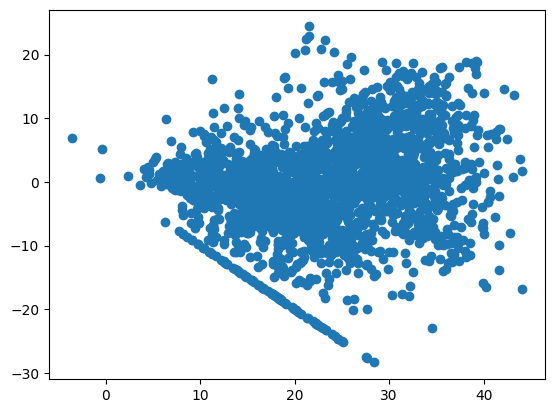

In [117]:
# Heteroscadacity

plt.scatter((y_pred_test), (y_test - y_pred_test))

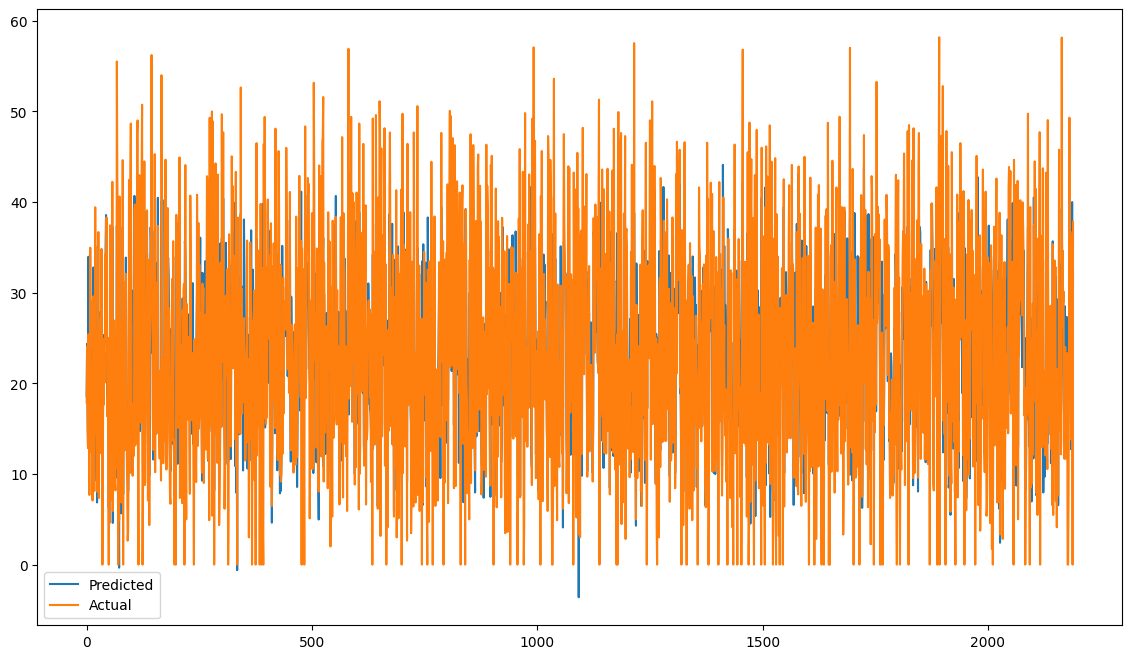

In [118]:
# Plot figure

plt.figure(figsize=(14,8))
plt.plot(np.array(y_pred_test))
plt.plot(np.array(y_test))
plt.legend(['Predicted', 'Actual'], loc='best')
plt.show()

#**Decision Tree**

In [119]:
# import package

In [120]:
decision_reg = DecisionTreeRegressor(criterion="squared_error", max_depth=8, max_features=9, max_leaf_nodes =100)

In [121]:
# fit the model

decision_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, max_features=9, max_leaf_nodes=100)

In [122]:
decision_reg.score(X_train, y_train)

0.690475251156946

In [123]:
# Getting predicted values

y_pred_train = decision_reg.predict(X_train)
y_pred_test = decision_reg.predict(X_test)

In [124]:
# Calculation for train sets

# Calculate MSE
MSE_dt= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_dt)


# Calculate RMSE

RMSE_dt = np.sqrt(MSE_dt)
print("RMSE", RMSE_dt)



# Calculate MAE

MAE_dt = mean_absolute_error(y_train, y_pred_train)
print("MAE", MAE_dt)


# Calculate R2_Score

R2_dt = r2_score(y_train, y_pred_train)
print("R2", R2_dt)


# Calculate Ajusted R2

Adjusted_R2_dt = (1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2", Adjusted_R2_dt)

MSE : 47.66392617937301
RMSE 6.903906588256609
MAE 5.1241591569323255
R2 0.690475251156946
Adjusted R2 0.6641328134954473


* Here we get r2 score value 0.7033 that means our model is performing good on this data variance.

In [125]:
# storing the train set metrics value in a dataframe for later comparison


dict1 = {"Model":"Decision Tree Regression",
         "MAE": round((MAE_dt),3),
         "MSE": round((MSE_dt),3),
         "RMSE": round((RMSE_dt),3),
         "R2_score": round((R2_dt),3),
         "Adjusted_R2": round((Adjusted_R2_dt),3)
         }

In [126]:
traning_set = traning_set.append(dict1, ignore_index=True)

In [127]:
traning_set

Model    MAE     MSE   RMSE  R2_score  Adjusted_R2
0         Linear Regression  4.474  35.078  5.923     0.772        0.767
1          Lasso Regression  7.255  91.594  9.570     0.405        0.392
2          Ridge Regression  4.474  35.078  5.923     0.772        0.785
3     ElasticNet Regression  5.792  57.574  7.588     0.626        0.615
4  Decision Tree Regression  5.124  47.664  6.904     0.690        0.664

In [128]:
# Calculation for test sets

# Calculate MSE
MSE_dt = mean_squared_error(y_test, y_pred_test)
print("MSE", MSE_dt)


# Calculate RMSE

RMSE_dt = np.sqrt(MSE_dt)
print("RMSE", RMSE_dt)



# Calculate MAE

MAE_dt = mean_absolute_error(y_test,  y_pred_test)
print("MAE", MAE_dt)


# Calculate R2_Score

R2_dt = r2_score(y_test, y_pred_test)
print("R2", R2_dt)


# Calculate Ajusted R2

Adjusted_R2_dt=(1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2", Adjusted_R2_dt)

MSE 51.916572304210426
RMSE 7.2053155589613445
MAE 5.437048753607628
R2 0.6713442149416391
Adjusted R2 0.6641328134954473


* Here we get r2 score value 0.6851 that means our model is performing good on this data variance.

In [129]:
# storing the test set metrics value in a dataframe for later comparison


dict2 = {"Model":"Decision Tree Regression",
         "MAE": round((MAE_dt),3),
         "MSE": round((MSE_dt),3),
         "RMSE": round((RMSE_dt),3),
         "R2_score": round((R2_dt),3),
         "Adjusted_R2": round((Adjusted_R2_dt),3)
         }

test_set = test_set.append(dict2, ignore_index=True)

In [130]:
test_set

Model    MAE     MSE   RMSE  R2_score  Adjusted_R2
0         Linear Regression  4.410  33.275  5.768     0.789        0.785
1          Lasso Regression  7.456  96.775  9.837     0.387        0.374
2          Ridge Regression  4.410  33.277  5.769     0.789        0.785
3     ElasticNet Regression  5.874  59.451  7.710     0.624        0.615
4  Decision Tree Regression  5.437  51.917  7.205     0.671        0.664

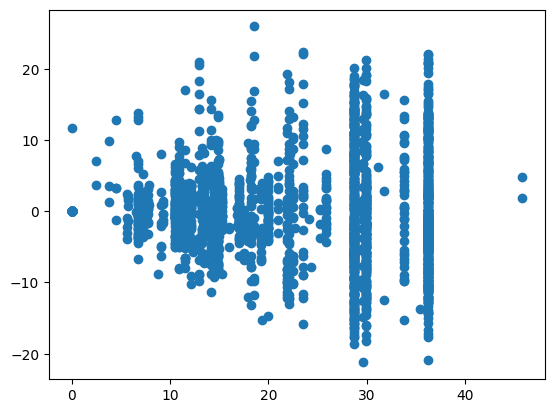

In [131]:
# Heteroscadacity

plt.scatter((y_pred_test), (y_test - y_pred_test))

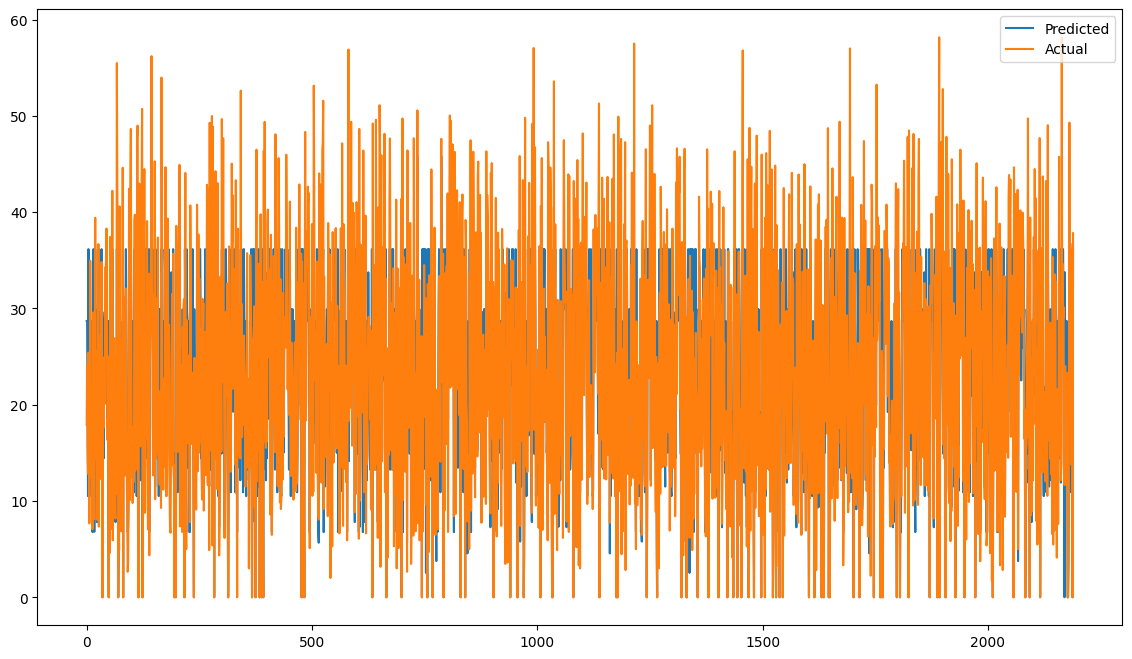

In [132]:
# plot figure

plt.figure(figsize=(14,8))
plt.plot(np.array(y_pred_test))
plt.plot(np.array(y_test))
plt.legend(['Predicted','Actual'], loc='best')
plt.show()

#**Random Forest**

In [133]:
# import package

In [134]:
# create and object for randomforest

rf_model = RandomForestRegressor()

In [135]:

# fit the model

rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [136]:
# Checking for score

rf_model.score(X_train, y_train)

0.9895977617003039

In [137]:

# finding predicted values

y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

In [138]:
# Calculation for train sets

# Calculate MSE
MSE_rm= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_rm)


# Calculate RMSE

RMSE_rm = np.sqrt(MSE_rm)
print("RMSE", RMSE_rm)



# Calculate MAE

MAE_rm = mean_absolute_error(y_train, y_pred_train)
print("MAE", MAE_rm)


# Calculate R2_Score

R2_rm = r2_score(y_train, y_pred_train)
print("R2", R2_rm)


# Calculate Ajusted R2

Adjusted_R2_rm = (1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2", Adjusted_R2_rm)

MSE : 1.601847736797175
RMSE 1.265641235420676
MAE 0.8019001387836796
R2 0.9895977617003039
Adjusted R2 0.9167769597740634


* Here we get r2 score value 0.989 that means our model is performing very good on this data variance.

In [139]:
# storing the train set metrics value in a dataframe for later comparison


dict1 = {"Model":"Random Forest Regression",
         "MAE": round((MAE_rm),3),
         "MSE": round((MSE_rm),3),
         "RMSE": round((RMSE_rm),3),
         "R2_score": round((R2_rm),3),
         "Adjusted_R2": round((Adjusted_R2_rm),3)
         }

traning_set = traning_set.append(dict1, ignore_index=True)

In [140]:

# Calculation for test sets

# Calculate MSE
MSE_rf = mean_squared_error(y_test, y_pred_test)
print("MSE", MSE_rf)


# Calculate RMSE

RMSE_rf = np.sqrt(MSE_rf)
print("RMSE", RMSE_rf)



# Calculate MAE

MAE_rf = mean_absolute_error(y_test,  y_pred_test)
print("MAE", MAE_rf)


# Calculate R2_Score

R2_rf = r2_score(y_test, y_pred_test)
print("R2", R2_rf)


# Calculate Ajusted R2

Adjusted_R2_rf=(1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2", Adjusted_R2_rf)

MSE 12.864177147616301
RMSE 3.586666578818876
MAE 2.2258973251105276
R2 0.9185638409483983
Adjusted R2 0.9167769597740634


* Here we get r2 score value 0.9182 that means our model is performing very good on this data variance.

In [141]:
# storing the test set metrics value in a dataframe for later comparison


dict2 = {"Model":"Random Forest Regressor",
         "MAE": round((MAE_rf),3),
         "MSE": round((MSE_rf),3),
         "RMSE": round((RMSE_rf),3),
         "R2_score": round((R2_rf),3),
         "Adjusted_R2": round((Adjusted_R2_rf),3)
         }

test_set = test_set.append(dict2, ignore_index=True)

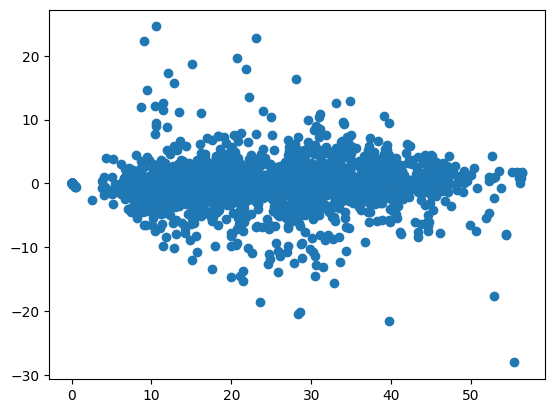

In [142]:
# Heteroscadacity

plt.scatter((y_pred_test), (y_test - y_pred_test))

In [143]:
rf_model.feature_importances_

array([3.16706427e-01, 1.60277936e-01, 1.21291238e-02, 1.21692839e-02,
       3.16455522e-02, 3.14821727e-02, 1.39947213e-03, 4.57080420e-03,
       1.29149943e-02, 1.98128957e-02, 2.86467715e-02, 2.46127578e-02,
       7.61264097e-03, 4.14564549e-03, 1.33288921e-02, 1.09615840e-03,
       2.23957650e-03, 1.07807267e-03, 2.87277669e-04, 2.63006977e-04,
       3.94754538e-04, 1.40648632e-03, 3.73599273e-03, 1.06718750e-02,
       3.12146187e-02, 1.77810627e-02, 1.26644023e-02, 1.28827652e-02,
       1.00856841e-02, 4.22292250e-03, 4.01429781e-03, 8.30108229e-04,
       7.28053151e-03, 3.93187915e-03, 1.51160533e-01, 3.13003242e-04,
       3.63762808e-03, 1.26636381e-03, 1.45197635e-03, 2.42808823e-03,
       6.98873781e-04, 2.13568940e-03, 9.32350318e-04, 2.60276786e-03,
       5.83244794e-03, 7.61132867e-04, 1.92423027e-02])

In [144]:
importance = rf_model.feature_importances_
importance_df = {"Feature" : list(X_train.columns),
                 "Feature_importance": importance}

importance_df = pd.DataFrame(importance_df)

In [145]:
importance_df['Feature_importance'] = round(importance_df["Feature_importance"], 2)

importance_df.sort_values(by=['Feature_importance'], ascending=False)

Feature  Feature_importance
0           Temperature                0.32
1              Humidity                0.16
34  Functioning_Day_Yes                0.15
10               Hour_4                0.03
4       Solar_Radiation                0.03
5              Rainfall                0.03
24              Hour_18                0.03
25              Hour_19                0.02
11               Hour_5                0.02
46            Weekend_1                0.02
9                Hour_3                0.02
3            Visibility                0.01
44             Month_11                0.01
2            Wind_speed                0.01
32       Seasons_Winter                0.01
8                Hour_2                0.01
27              Hour_21                0.01
26              Hour_20                0.01
28              Hour_22                0.01
23              Hour_17                0.01
12               Hour_6                0.01
14               Hour_8                0.01
13               Hour_7                0.00
45             Month_12                0.00
43             Month_10                0.00
42              Month_9                0.00
41              Month_8                0.00
40              Month_7                0.00
39              Month_6                0.00
38              Month_5                0.00
37              Month_4                0.00
36              Month_3                0.00
35              Month_2                0.00
19              Hour_13                0.00
20              Hour_14                0.00
31       Seasons_Summer                0.00
30       Seasons_Spring                0.00
29              Hour_23                0.00
15               Hour_9                0.00
16              Hour_10                0.00
17              Hour_11                0.00
18              Hour_12                0.00
6              Snowfall                0.00
7                Hour_1                0.00
22              Hour_16                0.00
21              Hour_15                0.00
33   Holiday_No Holiday                0.00

In [146]:
# once again fit the model
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [147]:
features = X_train.columns
importance = rf_model.feature_importances_

indices = np.argsort(importance)

In [148]:
importance

array([3.14584160e-01, 1.61115075e-01, 1.21337478e-02, 1.22784139e-02,
       3.00075944e-02, 3.26025685e-02, 1.45436695e-03, 4.73926811e-03,
       1.35914281e-02, 2.05786466e-02, 2.96479523e-02, 2.58984103e-02,
       8.09679508e-03, 3.87022748e-03, 1.37779480e-02, 1.00258585e-03,
       2.47750986e-03, 1.15154476e-03, 3.10495639e-04, 2.39313252e-04,
       3.91047316e-04, 1.37470551e-03, 3.39799147e-03, 1.03093078e-02,
       3.12274461e-02, 1.76722165e-02, 1.16795879e-02, 1.26759206e-02,
       9.66478675e-03, 3.59371162e-03, 3.62831078e-03, 8.75537922e-04,
       7.74463207e-03, 3.93156099e-03, 1.50640138e-01, 3.17071060e-04,
       3.88144948e-03, 1.32830440e-03, 1.56701937e-03, 2.53901184e-03,
       7.04813469e-04, 1.83243331e-03, 7.38341750e-04, 3.09937437e-03,
       5.71380538e-03, 7.76674293e-04, 1.91367479e-02])

In [149]:
importance[indices]

array([2.39313252e-04, 3.10495639e-04, 3.17071060e-04, 3.91047316e-04,
       7.04813469e-04, 7.38341750e-04, 7.76674293e-04, 8.75537922e-04,
       1.00258585e-03, 1.15154476e-03, 1.32830440e-03, 1.37470551e-03,
       1.45436695e-03, 1.56701937e-03, 1.83243331e-03, 2.47750986e-03,
       2.53901184e-03, 3.09937437e-03, 3.39799147e-03, 3.59371162e-03,
       3.62831078e-03, 3.87022748e-03, 3.88144948e-03, 3.93156099e-03,
       4.73926811e-03, 5.71380538e-03, 7.74463207e-03, 8.09679508e-03,
       9.66478675e-03, 1.03093078e-02, 1.16795879e-02, 1.21337478e-02,
       1.22784139e-02, 1.26759206e-02, 1.35914281e-02, 1.37779480e-02,
       1.76722165e-02, 1.91367479e-02, 2.05786466e-02, 2.58984103e-02,
       2.96479523e-02, 3.00075944e-02, 3.12274461e-02, 3.26025685e-02,
       1.50640138e-01, 1.61115075e-01, 3.14584160e-01])

Text(0.5, 0, 'Retails Importance')

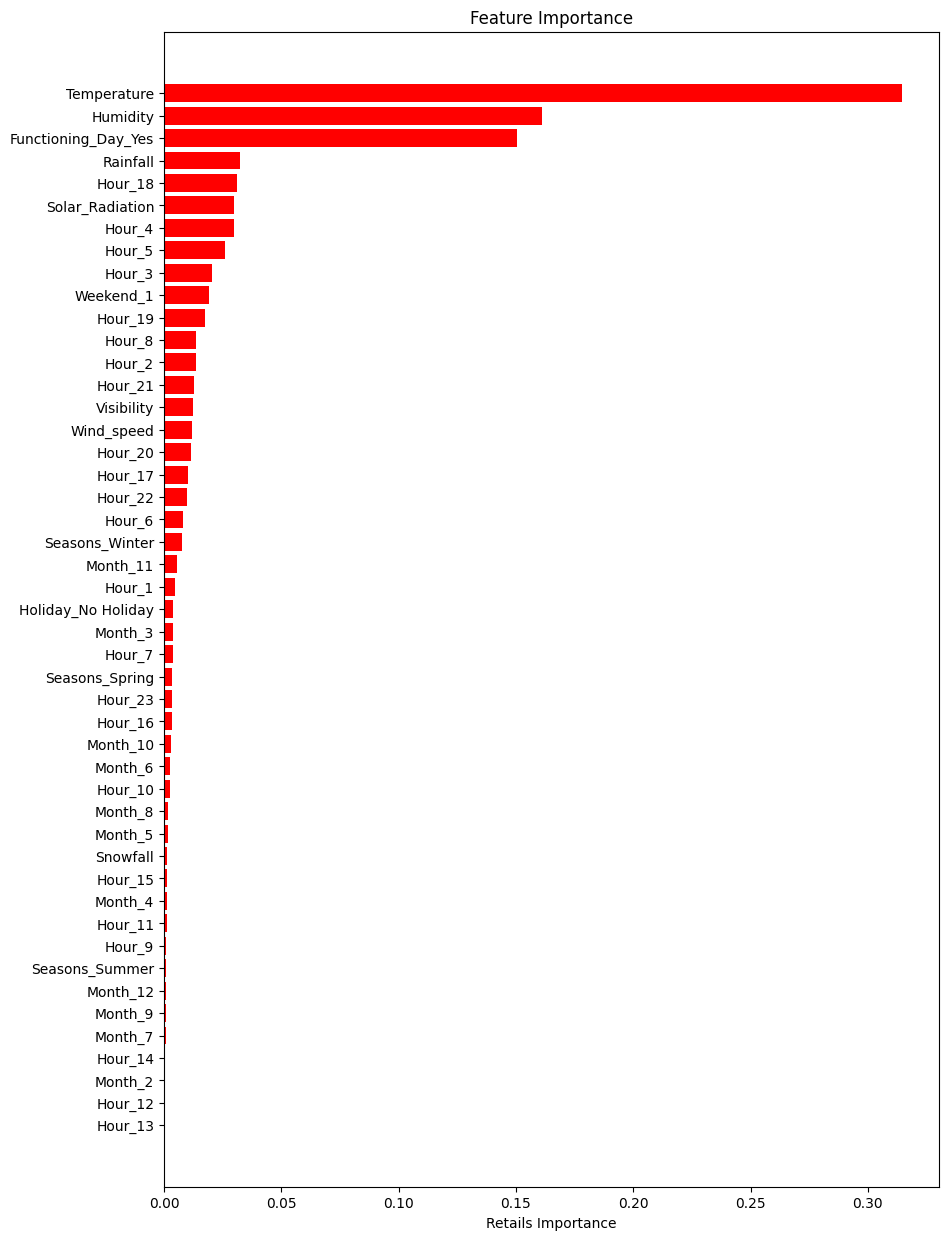

In [150]:
# plot figure

plt.figure(figsize=(10,15))
plt.title("Feature Importance")
plt.barh(range(len(indices)), importance[indices], color='Red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Retails Importance")

#**Gradient Boosting**

In [151]:
# import package

In [152]:
# create object
gb_model = GradientBoostingRegressor()

In [153]:
# fit the model
gb_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [154]:



# getting predicted values
y_pred_train = gb_model.predict(X_train)
y_pred_test = gb_model.predict(X_test)

In [155]:
# getting score

gb_model.score(X_train, y_train)

0.8789016499095264

In [156]:

# Calculation for train sets

# Calculate MSE
MSE_gb = mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_gb)


# Calculate RMSE

RMSE_gb = np.sqrt(MSE_gb)
print("RMSE", RMSE_gb)



# Calculate MAE

MAE_gb = mean_absolute_error(y_train, y_pred_train)
print("MAE", MAE_gb)


# Calculate R2_Score

R2_gb = r2_score(y_train, y_pred_train)
print("R2", R2_gb)


# Calculate Ajusted R2

Adjusted_R2_gb = (1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2", Adjusted_R2_gb)

MSE : 18.64801713184794
RMSE 4.3183349953249275
MAE 3.2690035692731247
R2 0.8789016499095264
Adjusted R2 0.8622708584843188


* Here we get r2 score value 0.8789 that means our model is performing very good on this data variance.

In [157]:

# storing the train set metrics value in a dataframe for later comparison


dict1 = {"Model":"Gradient Boosting Regression",
         "MAE": round((MAE_gb),3),
         "MSE": round((MSE_gb),3),
         "RMSE": round((RMSE_gb),3),
         "R2_score": round((R2_gb),3),
         "Adjusted_R2": round((Adjusted_R2_gb),3)
         }

traning_set = traning_set.append(dict1, ignore_index=True)

In [158]:
# Calculation for test sets

# Calculate MSE
MSE_gb = mean_squared_error(y_test, y_pred_test)
print("MSE", MSE_gb)


# Calculate RMSE

RMSE_gb = np.sqrt(MSE_gb)
print("RMSE", RMSE_gb)



# Calculate MAE

MAE_gb = mean_absolute_error(y_test,  y_pred_test)
print("MAE", MAE_gb)


# Calculate R2_Score

R2_gb = r2_score(y_test, y_pred_test)
print("R2", R2_gb)


# Calculate Ajusted R2

Adjusted_R2_gb=(1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2", Adjusted_R2_gb)

MSE 21.28944184250869
RMSE 4.6140483138463875
MAE 3.492858786559991
R2 0.8652280396863458
Adjusted R2 0.8622708584843188


* Here we get r2 score value 0.8652 that means our model is performing good on this data variance.

In [159]:
# storing the test set metrics value in a dataframe for later comparison


dict2 = {"Model":"Gradient Boosting Regressor",
         "MAE": round((MAE_gb),3),
         "MSE": round((MSE_gb),3),
         "RMSE": round((RMSE_gb),3),
         "R2_score": round((R2_gb),3),
         "Adjusted_R2": round((Adjusted_R2_gb),3)
         }

test_set = test_set.append(dict2, ignore_index=True)

In [160]:
test_set

Model    MAE     MSE   RMSE  R2_score  Adjusted_R2
0            Linear Regression  4.410  33.275  5.768     0.789        0.785
1             Lasso Regression  7.456  96.775  9.837     0.387        0.374
2             Ridge Regression  4.410  33.277  5.769     0.789        0.785
3        ElasticNet Regression  5.874  59.451  7.710     0.624        0.615
4     Decision Tree Regression  5.437  51.917  7.205     0.671        0.664
5      Random Forest Regressor  2.226  12.864  3.587     0.919        0.917
6  Gradient Boosting Regressor  3.493  21.289  4.614     0.865        0.862

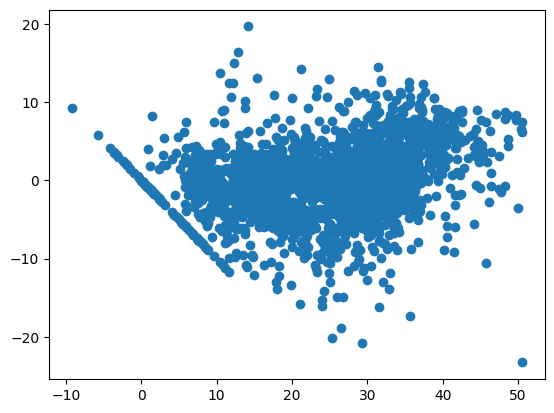

In [161]:
# Heterocadacity

plt.scatter((y_pred_test), (y_test - y_pred_test))

In [162]:
gb_model.feature_importances_

array([3.21568683e-01, 1.28054219e-01, 5.06472446e-04, 4.41033341e-04,
       4.82210501e-02, 6.50977064e-02, 3.00825496e-05, 4.41679040e-04,
       6.20291012e-03, 1.54723207e-02, 2.77923448e-02, 2.09197623e-02,
       5.54914116e-03, 1.38849071e-03, 9.51964101e-03, 0.00000000e+00,
       2.87933226e-03, 1.37560679e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.08156531e-04, 7.57741782e-03,
       3.03117662e-02, 1.74699066e-02, 1.14240782e-02, 1.55664225e-02,
       1.20487441e-02, 2.45479420e-04, 1.42322866e-05, 0.00000000e+00,
       3.35174157e-02, 2.23294271e-03, 1.74747832e-01, 0.00000000e+00,
       1.72209214e-03, 9.33502112e-05, 2.82254756e-04, 4.18000398e-03,
       0.00000000e+00, 2.53746805e-03, 0.00000000e+00, 6.76468137e-03,
       5.12015005e-03, 2.89720073e-04, 1.79854096e-02])

In [163]:
importance = gb_model.feature_importances_
features = X_train.columns

importance_df = {"Features":features,
                 "Feature_importance":importance}

importance_df = pd.DataFrame(importance_df)
importance_df.head()

Features  Feature_importance
0      Temperature            0.321569
1         Humidity            0.128054
2       Wind_speed            0.000506
3       Visibility            0.000441
4  Solar_Radiation            0.048221

In [164]:
importance_df.sort_values(by=['Feature_importance'], ascending=False).head()

Features  Feature_importance
0           Temperature            0.321569
34  Functioning_Day_Yes            0.174748
1              Humidity            0.128054
5              Rainfall            0.065098
4       Solar_Radiation            0.048221

In [165]:
# fit the model
gb_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [166]:
features = X_train.columns
importance = gb_model.feature_importances_
indices = np.argsort(importance)

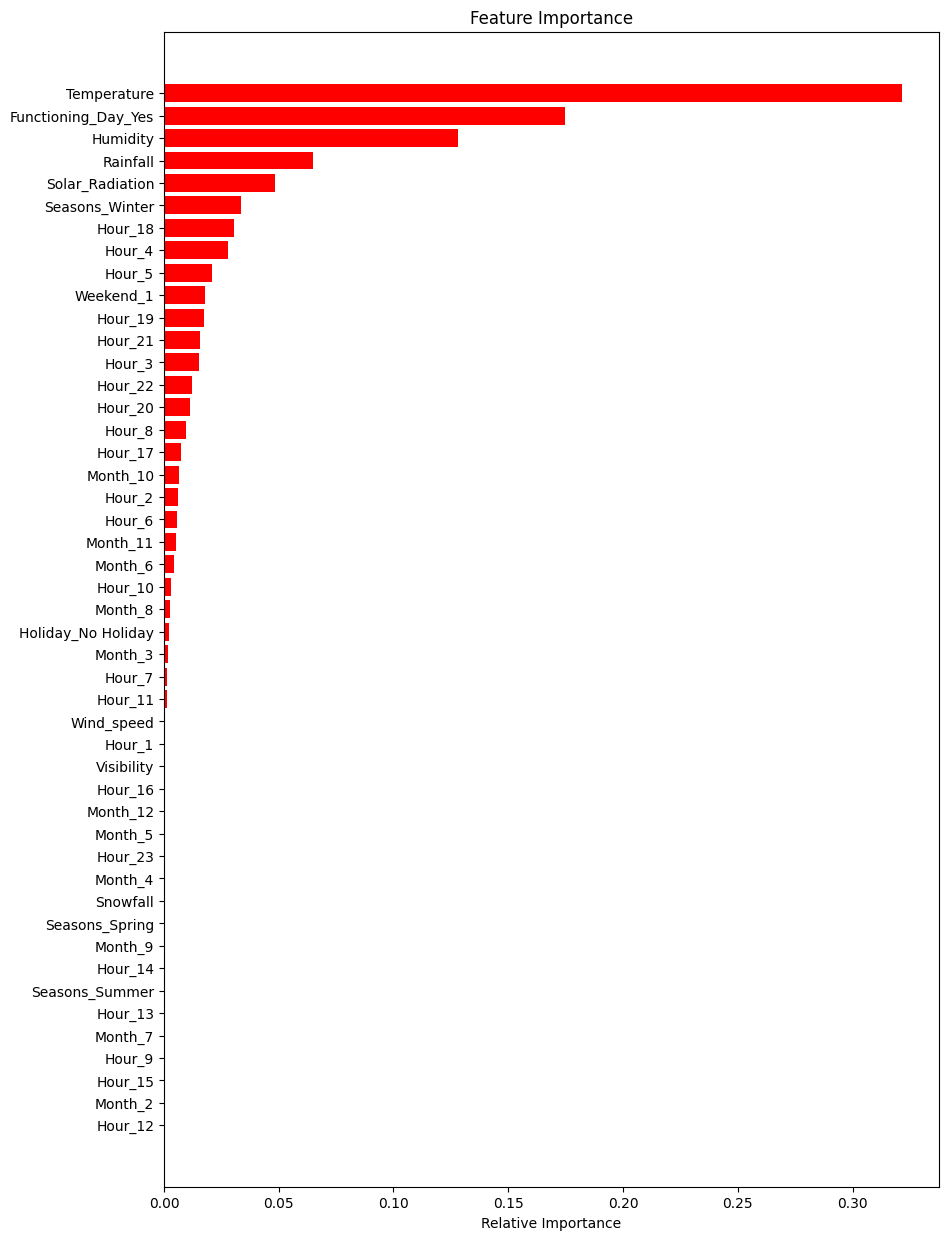

In [167]:
# plot figure

plt.figure(figsize=(10,15))
plt.title("Feature Importance")
plt.barh(range(len(indices)), importance[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

##**HyperParameter tuning**

In [168]:
# Gradient Boosting Regressor with GridSearchCV

# Number of trees
n_estimators = [50,80,100]

# Maximun depth of trees
max_depth = [4 , 6 , 8]

# Maximum number of samples req to split a nodes
min_sample_split = [50,100,150]

# Maximum number of samples req to each leaf node
min_sample_leaf = [40,50]

In [169]:
# Hyperparameter grid
param_grid = {"n_estimators" : n_estimators,
              "max_depth" : max_depth,
              "min_samples_split" : min_sample_split,
              "min_samples_leaf" : min_sample_leaf}

param_grid

{'n_estimators': [50, 80, 100],
 'max_depth': [4, 6, 8],
 'min_samples_split': [50, 100, 150],
 'min_samples_leaf': [40, 50]}

#**Importing Gradient Boosting Regressor**


In [170]:

from sklearn.model_selection import GridSearchCV
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

# Grid search
gb_grid = GridSearchCV(estimator=gb_model,
                       param_grid = param_grid,
                       cv = 5, verbose=2)


In [171]:
# Fit our model
gb_grid.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.2s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [172]:
gb_grid.best_estimator_

GradientBoostingRegressor(max_depth=8, min_samples_leaf=40,
                          min_samples_split=50)

In [173]:
gb_optimal_model = gb_grid.best_estimator_

In [174]:
# Getting best parameters

gb_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 100}

In [175]:
# Gettin predicted values

y_pred_train = gb_optimal_model.predict(X_train)
y_pred_test = gb_optimal_model.predict(X_test)

In [176]:
# Find score

gb_optimal_model.score(X_train, y_train)

0.9515896672300013

In [177]:
# Calculation for train sets

# Calculate MSE
MSE_gb = mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_gb)


# Calculate RMSE

RMSE_gb = np.sqrt(MSE_gb)
print("RMSE", RMSE_gb)



# Calculate MAE

MAE_gb = mean_absolute_error(y_train, y_pred_train)
print("MAE", MAE_gb)


# Calculate R2_Score

R2_gb = r2_score(y_train, y_pred_train)
print("R2", R2_gb)


# Calculate Ajusted R2

Adjusted_R2_gb = (1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2", Adjusted_R2_gb)

MSE : 7.454740004128373
RMSE 2.7303369762958516
MAE 1.8489194833919358
R2 0.9515896672300013
Adjusted R2 0.9198267251413182


* Here we get r2 score value 0.9515 that means our model is performing good on this data variance.

In [178]:
# storing the train set metrics value in a dataframe for later comparison


dict1 = {"Model":"Gradient Boosting using gridsearchcv",
         "MAE": round((MAE_gb),3),
         "MSE": round((MSE_gb),3),
         "RMSE": round((RMSE_gb),3),
         "R2_score": round((R2_gb),3),
         "Adjusted_R2": round((Adjusted_R2_gb),3)
         }

traning_set = traning_set.append(dict1, ignore_index=True)

In [179]:
traning_set

Model    MAE     MSE   RMSE  R2_score  \
0                     Linear Regression  4.474  35.078  5.923     0.772   
1                      Lasso Regression  7.255  91.594  9.570     0.405   
2                      Ridge Regression  4.474  35.078  5.923     0.772   
3                 ElasticNet Regression  5.792  57.574  7.588     0.626   
4              Decision Tree Regression  5.124  47.664  6.904     0.690   
5              Random Forest Regression  0.802   1.602  1.266     0.990   
6          Gradient Boosting Regression  3.269  18.648  4.318     0.879   
7  Gradient Boosting using gridsearchcv  1.849   7.455  2.730     0.952   

   Adjusted_R2  
0        0.767  
1        0.392  
2        0.785  
3        0.615  
4        0.664  
5        0.917  
6        0.862  
7        0.920

In [180]:
# Calculation for test sets

# Calculate MSE
MSE_gd = mean_squared_error(y_test, y_pred_test)
print("MSE", MSE_gd)


# Calculate RMSE

RMSE_gd = np.sqrt(MSE_gd)
print("RMSE", RMSE_gd)



# Calculate MAE

MAE_gd = mean_absolute_error(y_test,  y_pred_test)
print("MAE", MAE_gd)


# Calculate R2_Score

R2_gd = r2_score(y_test, y_pred_test)
print("R2", R2_gd)


# Calculate Ajusted R2

Adjusted_R2_gd = (1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2", Adjusted_R2_gd)

MSE 12.392760556291103
RMSE 3.520335290322657
MAE 2.4005915565405354
R2 0.921548124829924
Adjusted R2 0.9198267251413182


* Here we get r2 score value 0.9215 that means our model is performing good on this data variance.

In [181]:
# storing the test set metrics value in a dataframe for later comparison


dict2 = {"Model":"Gradient Boosting using gridsearchcv",
         "MAE": round((MAE_gd),3),
         "MSE": round((MSE_gd),3),
         "RMSE": round((RMSE_gd),3),
         "R2_score": round((R2_gd),3),
         "Adjusted_R2": round((Adjusted_R2_gd),3)
         }

test_set = test_set.append(dict2, ignore_index=True)
test_set

Model    MAE     MSE   RMSE  R2_score  \
0                     Linear Regression  4.410  33.275  5.768     0.789   
1                      Lasso Regression  7.456  96.775  9.837     0.387   
2                      Ridge Regression  4.410  33.277  5.769     0.789   
3                 ElasticNet Regression  5.874  59.451  7.710     0.624   
4              Decision Tree Regression  5.437  51.917  7.205     0.671   
5               Random Forest Regressor  2.226  12.864  3.587     0.919   
6           Gradient Boosting Regressor  3.493  21.289  4.614     0.865   
7  Gradient Boosting using gridsearchcv  2.401  12.393  3.520     0.922   

   Adjusted_R2  
0        0.785  
1        0.374  
2        0.785  
3        0.615  
4        0.664  
5        0.917  
6        0.862  
7        0.920

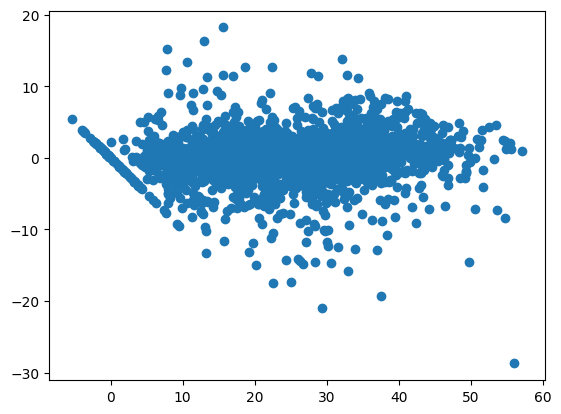

In [182]:

# Heteroscadacity

plt.scatter((y_pred_test), (y_test - y_pred_test))

In [183]:

gb_optimal_model.feature_importances_

array([3.12057438e-01, 1.52960270e-01, 6.20316780e-03, 6.03743312e-03,
       3.75324776e-02, 4.41384879e-02, 1.25380735e-03, 9.51937002e-04,
       9.98653930e-03, 1.96911560e-02, 2.89529919e-02, 2.45449359e-02,
       6.18872117e-03, 3.32550727e-03, 1.20634772e-02, 4.66509851e-04,
       3.73626049e-03, 2.06003352e-03, 6.36119042e-05, 1.39325973e-04,
       9.77140091e-05, 5.27337742e-04, 1.33847427e-03, 9.51593158e-03,
       3.11372494e-02, 1.65223193e-02, 1.21776066e-02, 1.44682226e-02,
       9.91879886e-03, 2.41023598e-03, 3.67911329e-03, 1.06796008e-03,
       1.62472784e-02, 2.18064007e-03, 1.57198472e-01, 7.75938658e-05,
       1.30043275e-03, 1.32742892e-04, 1.66051097e-03, 2.73793528e-03,
       1.57808484e-03, 6.24873503e-03, 7.62045639e-05, 6.35447256e-03,
       4.56464936e-03, 1.05534757e-03, 2.33718468e-02])

In [184]:
importance = gb_optimal_model.feature_importances_
feature = X_train.columns

importance_df = {"Features":feature,
                 "Feature_importance":importance}
importance_df = pd.DataFrame(importance_df)

In [185]:
importance_df['Feature_importance'] = round(importance_df['Feature_importance'], 2)

In [186]:
importance_df.sort_values(by=['Feature_importance'], ascending = False)

Features  Feature_importance
0           Temperature                0.31
34  Functioning_Day_Yes                0.16
1              Humidity                0.15
4       Solar_Radiation                0.04
5              Rainfall                0.04
10               Hour_4                0.03
24              Hour_18                0.03
32       Seasons_Winter                0.02
25              Hour_19                0.02
11               Hour_5                0.02
46            Weekend_1                0.02
9                Hour_3                0.02
8                Hour_2                0.01
43             Month_10                0.01
41              Month_8                0.01
2            Wind_speed                0.01
3            Visibility                0.01
12               Hour_6                0.01
28              Hour_22                0.01
27              Hour_21                0.01
26              Hour_20                0.01
23              Hour_17                0.01
14               Hour_8                0.01
22              Hour_16                0.00
35              Month_2                0.00
45             Month_12                0.00
44             Month_11                0.00
13               Hour_7                0.00
42              Month_9                0.00
40              Month_7                0.00
39              Month_6                0.00
38              Month_5                0.00
37              Month_4                0.00
36              Month_3                0.00
15               Hour_9                0.00
21              Hour_15                0.00
33   Holiday_No Holiday                0.00
16              Hour_10                0.00
31       Seasons_Summer                0.00
30       Seasons_Spring                0.00
17              Hour_11                0.00
18              Hour_12                0.00
19              Hour_13                0.00
20              Hour_14                0.00
6              Snowfall                0.00
7                Hour_1                0.00
29              Hour_23                0.00

In [187]:
# fit model

gb_optimal_model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=8, min_samples_leaf=40,
                          min_samples_split=50)

In [188]:
features = X_train.columns
importance = gb_optimal_model.feature_importances_

indices = np.argsort(importance)

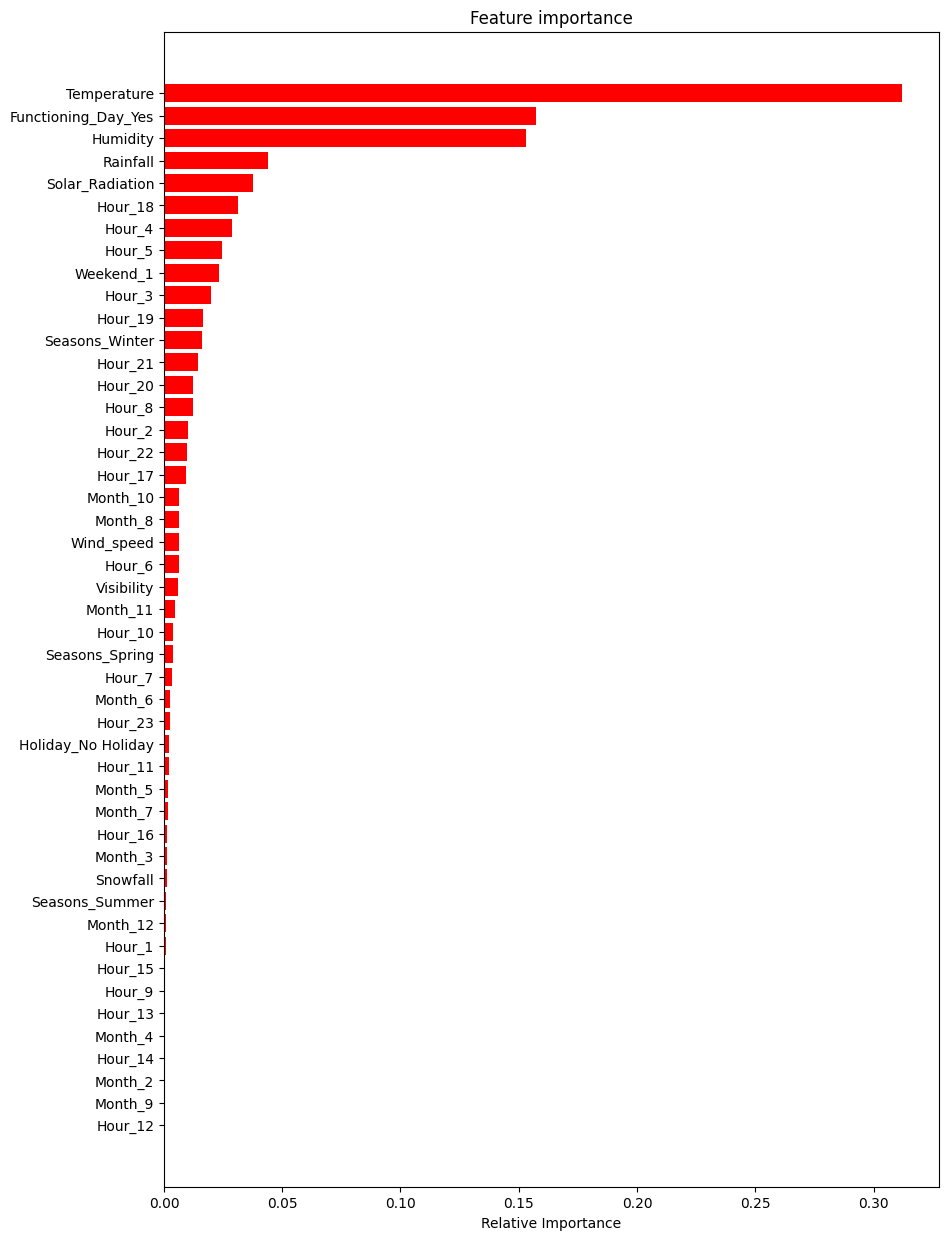

In [189]:
# plot figure

plt.figure(figsize=(10,15))
plt.barh(range(len(indices)), importance[indices], color='red', align = 'center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.title("Feature importance")
plt.xlabel('Relative Importance')
plt.show()

#**Conclusion**

* We implemented 7 machine learning algorithms Linear Regression, Lasso , Ridge,ElasticNet , Decision Tree, Random Forest and GradientBoostRegressor.
* We did hyperparameter tuning to improve our model performance. The results of our evaluation are:

In [190]:

# displaying the results of evaluation metric values for all model

final = pd.concat([traning_set,test_set], keys=['Traning set', 'Test set'])
final

Model    MAE     MSE   RMSE  \
Traning set 0                     Linear Regression  4.474  35.078  5.923   
            1                      Lasso Regression  7.255  91.594  9.570   
            2                      Ridge Regression  4.474  35.078  5.923   
            3                 ElasticNet Regression  5.792  57.574  7.588   
            4              Decision Tree Regression  5.124  47.664  6.904   
            5              Random Forest Regression  0.802   1.602  1.266   
            6          Gradient Boosting Regression  3.269  18.648  4.318   
            7  Gradient Boosting using gridsearchcv  1.849   7.455  2.730   
Test set    0                     Linear Regression  4.410  33.275  5.768   
            1                      Lasso Regression  7.456  96.775  9.837   
            2                      Ridge Regression  4.410  33.277  5.769   
            3                 ElasticNet Regression  5.874  59.451  7.710   
            4              Decision Tree Regression  5.437  51.917  7.205   
            5               Random Forest Regressor  2.226  12.864  3.587   
            6           Gradient Boosting Regressor  3.493  21.289  4.614   
            7  Gradient Boosting using gridsearchcv  2.401  12.393  3.520   

               R2_score  Adjusted_R2  
Traning set 0     0.772        0.767  
            1     0.405        0.392  
            2     0.772        0.785  
            3     0.626        0.615  
            4     0.690        0.664  
            5     0.990        0.917  
            6     0.879        0.862  
            7     0.952        0.920  
Test set    0     0.789        0.785  
            1     0.387        0.374  
            2     0.789        0.785  
            3     0.624        0.615  
            4     0.671        0.664  
            5     0.919        0.917  
            6     0.865        0.862  
            7     0.922        0.920


• No overfitting is seen.

• Random forest Regressor and Gradient Boosting gridsearchcv gives the highest R2 score of 99% and 95% recpectively for Train Set and 92% for Test set.

• Feature Importance value for Random Forest and Gradient Boost are different.

• We can deploy this model.


When we compare the root mean squared error and mean absolute error of all the models, the Gradient Boosting regressor model has less root mean squared error and mean absolute error, ending with the accuracy of 95% . So, finally this model is best for predicting the bike rental count on daily basis.As we can see the total amount of bike rentals increases with the temperature per month. Whereas it seems that the rentals are independent of the wind speed and the humidity, because they are almost constant over the months. This also confirms on the one hand the high correlation between rentals and temperature and on the other hand that nice weather could be a good predictor.So people mainly rent bikes on nice days and nice temperature. This could be important of planning new bike rental stations.

During the time of our analysis, we initially did EDA on all the features of our datset. We first analysed our dependent variable, 'Rented Bike Count' and also transformed it. Next we analysed categorical variable and dropped the variable who had majority of one class, we also analysed numerical variable, found out the correlation, distribution and their relationship with the dependent variable. We also removed some numerical features who had mostly 0 values and hot encoded the categorical variables.


However, this is not the ultimate end. As this data is time dependent, the values for variables like temperature, windspeed, solar radiation etc., will not always be consistent. Therefore, there will be scenarios where the model might not perform well. As Machine learning is an exponentially evolving field, we will have to be prepared for all contingencies and also keep checking our model from time to time. Therefore, having a quality knowledge and keeping pace with the ever evolving ML field would surely help one to stay a step ahead in future.